# *West Nile Virus Predction*

We'll train a machine learning model to predict when and where different species of mosquitos will test positive for West Nile virus using weather, location, testing, and spraying data.
A more accurate method of predicting outbreaks of West Nile virus in mosquitos will help the City of Chicago and CPHD more efficiently and effectively allocate resources towards preventing transmission of this potentially deadly virus. This motivated me to work on this dataset.

Dataset Link: https://www.kaggle.com/competitions/predict-west-nile-virus/data


## 1. Download the Dataset

- Install required libraries
- Download data from Kaggle
- Load datasets with Pandas

### Install Required Libraries

In [ ]:
!pip install numpy pandas jovian opendatasets scikit-learn xgboost --quiet

In [ ]:
import jovian

### Download Data from Kaggle

We'll use the opendatasets library: https://github.com/JovianML/opendatasets

In [ ]:
import opendatasets as od
dataset_url = 'https://www.kaggle.com/competitions/predict-west-nile-virus/data'
od.download(dataset_url)

100%|██████████| 14.4M/14.4M [00:00<00:00, 79.5MB/s]


Extracting archive ./predict-west-nile-virus/predict-west-nile-virus.zip to ./predict-west-nile-virus


### Loading Datasets


In [ ]:
import opendatasets as od
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib
import os
import plotly.express as px
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 150)
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (10, 6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

In [ ]:
train_df=pd.read_csv('/content/predict-west-nile-virus/train.csv.zip',parse_dates=['Date'])
test_df=pd.read_csv('/content/predict-west-nile-virus/test.csv.zip',parse_dates=['Date'])
weather_df=pd.read_csv('/content/predict-west-nile-virus/weather.csv.zip',parse_dates=['Date'])
spray_df=pd.read_csv('/content/predict-west-nile-virus/spray.csv.zip',parse_dates=['Date'])

## 2. Explore the Datasets

- Basic info about training set
- Basic info about test set
- Exploratory data analysis & visualization
- Ask & answer questions

### Training Set

In [ ]:
train_df.head(10)

,Date,Address,Species,Block,Street,Trap,AddressNumberAndStreet,Latitude,Longitude,AddressAccuracy,NumMosquitos,WnvPresent
0,2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX PIPIENS/RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.954690,-87.800991,9,1,0
1,2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.954690,-87.800991,9,1,0
2,2007-05-29,"6200 North Mandell Avenue, Chicago, IL 60646, USA",CULEX RESTUANS,62,N MANDELL AVE,T007,"6200 N MANDELL AVE, Chicago, IL",41.994991,-87.769279,9,1,0
3,2007-05-29,"7900 West Foster Avenue, Chicago, IL 60656, USA",CULEX PIPIENS/RESTUANS,79,W FOSTER AVE,T015,"7900 W FOSTER AVE, Chicago, IL",41.974089,-87.824812,8,1,0
4,2007-05-29,"7900 West Foster Avenue, Chicago, IL 60656, USA",CULEX RESTUANS,79,W FOSTER AVE,T015,"7900 W FOSTER AVE, Chicago, IL",41.974089,-87.824812,8,4,0
5,2007-05-29,"1500 West Webster Avenue, Chicago, IL 60614, USA",CULEX RESTUANS,15,W WEBSTER AVE,T045,"1500 W WEBSTER AVE, Chicago, IL",41.921600,-87.666455,8,2,0
6,2007-05-29,"2500 West Grand Avenue, Chicago, IL 60654, USA",CULEX RESTUANS,25,W GRAND AVE,T046,"2500 W GRAND AVE, Chicago, IL",41.891118,-87.654491,8,1,0
7,2007-05-29,"1100 Roosevelt Road, Chicago, IL 60608, USA",CULEX PIPIENS/RESTUANS,11,W ROOSEVELT,T048,"1100 W ROOSEVELT, Chicago, IL",41.867108,-87.654224,8,1,0
8,2007-05-29,"1100 Roosevelt Road, Chicago, IL 60608, USA",CULEX RESTUANS,11,W ROOSEVELT,T048,"1100 W ROOSEVELT, Chicago, IL",41.867108,-87.654224,8,2,0
9,2007-05-29,"1100 West Chicago Avenue, Chicago, IL 60642, USA",CULEX RESTUANS,11,W CHICAGO,T049,"1100 W CHICAGO, Chicago, IL",41.896282,-87.655232,8,1,0


In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10506 entries, 0 to 10505
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Date                    10506 non-null  datetime64[ns]
 1   Address                 10506 non-null  object        
 2   Species                 10506 non-null  object        
 3   Block                   10506 non-null  int64         
 4   Street                  10506 non-null  object        
 5   Trap                    10506 non-null  object        
 6   AddressNumberAndStreet  10506 non-null  object        
 7   Latitude                10506 non-null  float64       
 8   Longitude               10506 non-null  float64       
 9   AddressAccuracy         10506 non-null  int64         
 10  NumMosquitos            10506 non-null  int64         
 11  WnvPresent              10506 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(4), ob

In [ ]:
train_df.describe()

,Block,Latitude,Longitude,AddressAccuracy,NumMosquitos,WnvPresent
count,10506.000000,10506.000000,10506.000000,10506.000000,10506.000000,10506.000000
mean,35.687797,41.841139,-87.699908,7.819532,12.853512,0.052446
std,24.339468,0.112742,0.096514,1.452921,16.133816,0.222936
min,10.000000,41.644612,-87.930995,3.000000,1.000000,0.000000
25%,12.000000,41.732984,-87.760070,8.000000,2.000000,0.000000
50%,33.000000,41.846283,-87.694991,8.000000,5.000000,0.000000
75%,52.000000,41.954690,-87.627796,9.000000,17.000000,0.000000
max,98.000000,42.017430,-87.531635,9.000000,50.000000,1.000000


In [ ]:
pd.DatetimeIndex(train_df.Date).year.value_counts()

2007    3811
2013    2392
2009    2249
2011    2054
Name: Date, dtype: int64

Observations about training data:

- 10k+ rows with 12 columns
- No missing data (no nan)
- `NumMosquitoes` ranges from 1 to 50
- `passenger_count` ranges from 0 to 208
- There seem to be no errors in the latitude & longitude values
- `AddressAccuracy`ranges from 3 to 9
- No errors but a bit of preprocessing can be done

### Test Set

In [ ]:
test_df.sample(10)

,Id,Date,Address,Species,Block,Street,Trap,AddressNumberAndStreet,Latitude,Longitude,AddressAccuracy
32489,32490,2010-06-11,"South Stony Island Avenue, Chicago, IL, USA",CULEX SALINARIUS,10,S STONY ISLAND AVE,T138,"1000 S STONY ISLAND AVE, Chicago, IL",41.726465,-87.585413,5
31261,31262,2010-06-02,"3700 South Pulaski Road, Chicago, IL 60623, USA",CULEX SALINARIUS,37,S PULASKI RD,T063,"3700 S PULASKI RD, Chicago, IL",41.825610,-87.726549,9
110428,110429,2014-09-05,"4200 West 127th Street, Alsip, IL 60803, USA",CULEX PIPIENS/RESTUANS,42,W 127TH PL,T135,"4200 W 127TH PL, Chicago, IL",41.662014,-87.724608,8
51213,51214,2010-08-06,"6200 North Mcclellan Avenue, Chicago, IL 60646...",CULEX SALINARIUS,62,N MCCLELLAN AVE,T236,"6200 N MCCLELLAN AVE, Chicago, IL",41.994679,-87.770899,8
21344,21345,2008-08-25,"7300 Cicero Avenue, Chicago, IL 60638, USA",CULEX ERRATICUS,73,S CICERO AVE,T067,"7300 S CICERO AVE, Chicago, IL",41.759346,-87.745602,9
54485,54486,2010-08-20,"South Mackinaw Avenue, Chicago, IL 60617, USA",CULEX PIPIENS,13,S MACKINAW,T206,"1300 S MACKINAW, Chicago, IL",41.737052,-87.543067,5
61199,61200,2010-09-16,"1400 North Sacramento Avenue, Chicago, IL 6062...",CULEX TERRITANS,14,N HUMBOLDT DR,T033,"1400 N HUMBOLDT DR, Chicago, IL",41.906638,-87.701431,9
94728,94729,2014-06-05,"3300 West 104th Street, Chicago, IL 60655, USA",CULEX TERRITANS,33,W 104TH ST,T095,"3300 W 104TH ST, Chicago, IL",41.704336,-87.703736,8
48498,48499,2010-07-30,"5800 North Pulaski Road, Chicago, IL 60646, USA",CULEX PIPIENS,58,N PULASKI RD,T027,"5800 N PULASKI RD, Chicago, IL",41.984809,-87.728492,8
14266,14267,2008-07-29,"West 37th Place, Chicago, IL, USA",CULEX ERRATICUS,81,W 37TH PL.,T157,"8100 W 37TH PL., Chicago, IL",41.825902,-87.667827,5


In [ ]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116293 entries, 0 to 116292
Data columns (total 11 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   Id                      116293 non-null  int64         
 1   Date                    116293 non-null  datetime64[ns]
 2   Address                 116293 non-null  object        
 3   Species                 116293 non-null  object        
 4   Block                   116293 non-null  int64         
 5   Street                  116293 non-null  object        
 6   Trap                    116293 non-null  object        
 7   AddressNumberAndStreet  116293 non-null  object        
 8   Latitude                116293 non-null  float64       
 9   Longitude               116293 non-null  float64       
 10  AddressAccuracy         116293 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(3), object(5)
memory usage: 9.8+ MB


In [ ]:
test_df.describe()

,Id,Block,Latitude,Longitude,AddressAccuracy
count,116293.000000,116293.000000,116293.000000,116293.000000,116293.000000
mean,58147.000000,41.131100,41.849389,-87.693658,7.954357
std,33571.041765,24.864726,0.106593,0.080699,1.252733
min,1.000000,10.000000,41.644612,-87.930995,3.000000
25%,29074.000000,18.000000,41.753411,-87.750938,8.000000
50%,58147.000000,39.000000,41.862292,-87.694991,8.000000
75%,87220.000000,61.000000,41.951866,-87.648860,9.000000
max,116293.000000,98.000000,42.017430,-87.531635,9.000000


In [ ]:
pd.DatetimeIndex(test_df.Date).year.value_counts()

2010    36557
2008    30498
2012    27115
2014    22123
Name: Date, dtype: int64

Some observations about the test set:

- 116293 rows with 11 coumns of data
- No missing values
- No errors in data entry.
- Latitudes lie between the same range as it was in train_df.
- Longitudes lie between the same range as it was in train_df.
- Target column is `WnvPresent`

### Spray Data

In [ ]:
spray_df.sample(10)

,Date,Time,Latitude,Longitude
7540,2013-08-15,9:24:38 PM,41.945727,-87.800842
6761,2013-08-08,10:06:35 PM,41.941770,-87.685683
8885,2013-08-15,11:37:51 PM,41.912883,-87.780960
9273,2013-08-15,9:27:15 PM,41.926100,-87.805140
11753,2013-08-29,9:30:57 PM,41.781770,-87.698315
2100,2011-09-07,9:21:50 PM,41.983078,-87.816808
2769,2013-07-17,8:47:37 PM,41.716535,-87.635843
3488,2013-07-17,9:21:47 PM,41.735308,-87.648893
4158,2013-07-17,9:43:21 PM,41.731815,-87.641100
462,2011-09-07,9:10:02 PM,41.970238,-87.797877


In [ ]:
spray_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14835 entries, 0 to 14834
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       14835 non-null  datetime64[ns]
 1   Time       14251 non-null  object        
 2   Latitude   14835 non-null  float64       
 3   Longitude  14835 non-null  float64       
dtypes: datetime64[ns](1), float64(2), object(1)
memory usage: 463.7+ KB


In [ ]:
spray_df.describe()

,Latitude,Longitude
count,14835.000000,14835.000000
mean,41.904828,-87.736690
std,0.104381,0.067292
min,41.713925,-88.096468
25%,41.785001,-87.794225
50%,41.940075,-87.727853
75%,41.980978,-87.694108
max,42.395983,-87.586727


In [ ]:
pd.DatetimeIndex(spray_df.Date).year.value_counts()

2013    12626
2011     2209
Name: Date, dtype: int64

Some observations about the spray data set:

- 14835 rows with 4 coumns of data
- There seems to be some missing values in `Time` column.
- But feels like this dataset won't be useful for us by comparing the dates.
- The spraying records in the spray data are only for 2011 and 2013. But our test data is for 2008, 2010, 2012 and 2014 and so spraying data is not going to help our model for training and prediction.


### Weather Data

In [ ]:
weather_df.sample(10)

,Station,Date,Tmax,Tmin,Tavg,Depart,DewPoint,WetBulb,Heat,Cool,Sunrise,Sunset,CodeSum,Depth,Water1,SnowFall,PrecipTotal,StnPressure,SeaLevel,ResultSpeed,ResultDir,AvgSpeed
96,1,2007-06-18,89,69,79,9,65,70,0,14,0416,1929,TSRA RA HZ,0,M,0.0,0.28,29.12,29.84,14.0,20,15.1
570,1,2008-08-10,74,58,66,-7,52,58,0,1,0454,1900,,0,M,0.0,0.00,29.31,30.02,8.4,2,9.0
1289,2,2010-08-01,84,66,75,M,64,68,0,10,-,-,BR HZ,M,M,M,0.00,29.29,29.93,2.2,11,3.9
1650,1,2011-07-29,86,71,79,5,67,71,0,14,0442,1915,BR,0,M,0.0,0.70,29.28,29.98,4.3,4,5.9
516,1,2008-07-14,84,62,73,0,54,62,0,8,0428,1927,,0,M,0.0,0.00,29.22,29.92,4.5,29,7.8
1902,1,2012-06-01,65,49,57,-7,43,49,8,0,0419,1920,RA,0,M,0.0,0.01,29.07,29.80,7.3,36,9.9
1788,1,2011-10-06,81,50,66,10,51,58,0,1,0554,1725,,0,M,0.0,0.00,29.50,30.23,3.8,15,4.6
2055,2,2012-08-16,76,64,70,M,61,65,0,5,-,-,TSRA RA BR,M,M,M,0.31,29.20,29.83,7.3,22,9.5
673,2,2008-09-30,61,48,55,M,45,50,10,0,-,-,,M,M,M,0.01,29.27,29.94,9.3,31,9.5
1635,2,2011-07-21,101,82,92,M,72,77,0,27,-,-,,M,M,M,0.00,29.16,29.77,5.3,26,10.0


In [ ]:
weather_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2944 entries, 0 to 2943
Data columns (total 22 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Station      2944 non-null   int64         
 1   Date         2944 non-null   datetime64[ns]
 2   Tmax         2944 non-null   int64         
 3   Tmin         2944 non-null   int64         
 4   Tavg         2944 non-null   object        
 5   Depart       2944 non-null   object        
 6   DewPoint     2944 non-null   int64         
 7   WetBulb      2944 non-null   object        
 8   Heat         2944 non-null   object        
 9   Cool         2944 non-null   object        
 10  Sunrise      2944 non-null   object        
 11  Sunset       2944 non-null   object        
 12  CodeSum      2944 non-null   object        
 13  Depth        2944 non-null   object        
 14  Water1       2944 non-null   object        
 15  SnowFall     2944 non-null   object        
 16  Precip

In [ ]:
weather_df.describe()

,Station,Tmax,Tmin,DewPoint,ResultSpeed,ResultDir
count,2944.000000,2944.000000,2944.000000,2944.000000,2944.000000,2944.000000
mean,1.500000,76.166101,57.810462,53.457880,6.960666,17.494905
std,0.500085,11.461970,10.381939,10.675181,3.587527,10.063609
min,1.000000,41.000000,29.000000,22.000000,0.100000,1.000000
25%,1.000000,69.000000,50.000000,46.000000,4.300000,7.000000
50%,1.500000,78.000000,59.000000,54.000000,6.400000,19.000000
75%,2.000000,85.000000,66.000000,62.000000,9.200000,25.000000
max,2.000000,104.000000,83.000000,75.000000,24.100000,36.000000


Some observations about the weather data set:

- 2944 rows with 22 coumns of data
- There are many issues with this data frame like having `M` in certain places which represents the missing data.
- This data needs to be preprocessed before using it.

## 3. Data Preprocessing

There are lot of issues with the weather data, so let's preprocess the weather data first

### Stations


In [ ]:
import numpy as np

In [ ]:
weather_df.sample(5)

,Station,Date,Tmax,Tmin,Tavg,Depart,DewPoint,WetBulb,Heat,Cool,Sunrise,Sunset,CodeSum,Depth,Water1,SnowFall,PrecipTotal,StnPressure,SeaLevel,ResultSpeed,ResultDir,AvgSpeed
2597,2,2014-05-11,85,63,74,M,55,61,0,9,-,-,TSRA,M,M,M,0.41,29.26,29.90,7.8,17,10.1
1127,2,2010-05-12,53,46,50,M,45,47,15,0,-,-,TSRA RA DZ BR HZ,M,M,M,0.14,29.41,30.09,8.3,6,10.0
2632,1,2014-05-29,76,54,65,1,51,57,0,0,0421,1917,,0,M,0.0,0.00,29.38,30.09,8.4,5,9.0
2907,2,2014-10-13,71,59,65,M,61,62,0,0,-,-,RA BR HZ,M,M,M,0.44,29.03,29.73,7.5,15,8.9
669,2,2008-09-28,69,60,65,M,57,60,0,0,-,-,,M,M,M,0.00,29.46,30.11,7.3,4,7.4


According to the documentation '-' denotes unavailable values and 'M' denotes Missing values so we can replace both of these with Nan.

In [ ]:
weather_df=weather_df.replace('-',np.nan)
weather_df=weather_df.replace('M',np.nan)

In [ ]:
weather_df.isna().sum()

Station           0
Date              0
Tmax              0
Tmin              0
Tavg             11
Depart         1472
DewPoint          0
WetBulb           4
Heat             11
Cool             11
Sunrise        1472
Sunset         1472
CodeSum           0
Depth          1472
Water1         2944
SnowFall       1472
PrecipTotal       2
StnPressure       4
SeaLevel          9
ResultSpeed       0
ResultDir         0
AvgSpeed          3
dtype: int64

Now we will preprocess and analyse each and every column one by one

In [ ]:
weather_df.Station.value_counts()

1    1472
2    1472
Name: Station, dtype: int64

In [ ]:
weather_df.head(4)

,Station,Date,Tmax,Tmin,Tavg,Depart,DewPoint,WetBulb,Heat,Cool,Sunrise,Sunset,CodeSum,Depth,Water1,SnowFall,PrecipTotal,StnPressure,SeaLevel,ResultSpeed,ResultDir,AvgSpeed
0,1,2007-05-01,83,50,67,14,51,56,0,2,0448,1849,,0,NaN,0.0,0.00,29.10,29.82,1.7,27,9.2
1,2,2007-05-01,84,52,68,NaN,51,57,0,3,NaN,NaN,,NaN,NaN,NaN,0.00,29.18,29.82,2.7,25,9.6
2,1,2007-05-02,59,42,51,-3,42,47,14,0,0447,1850,BR,0,NaN,0.0,0.00,29.38,30.09,13.0,4,13.4
3,2,2007-05-02,60,43,52,NaN,42,47,13,0,NaN,NaN,BR HZ,NaN,NaN,NaN,0.00,29.44,30.08,13.3,2,13.4


In [ ]:
weather_df.Date.duplicated().sum()

1472

From the above observations we can say that two rows have same date for two different stations.

### **Tmax** and **Tmin**

In [ ]:
weather_df.Tmax.describe()

count    2944.000000
mean       76.166101
std        11.461970
min        41.000000
25%        69.000000
50%        78.000000
75%        85.000000
max       104.000000
Name: Tmax, dtype: float64

In [ ]:
weather_df.Tmax.isna().sum()

0

In [ ]:
weather_df.Tmin.describe()

count    2944.000000
mean       57.810462
std        10.381939
min        29.000000
25%        50.000000
50%        59.000000
75%        66.000000
max        83.000000
Name: Tmin, dtype: float64

In [ ]:
weather_df.Tmin.isna().sum()

0

No issues with the both columns above

### Tavg

In [ ]:
weather_df.Tavg.describe()

count     2933
unique      59
top         73
freq       138
Name: Tavg, dtype: object

In [ ]:
weather_df.Tavg.isna().sum()

11

In [ ]:
weather_df.iloc[:,2:5]

,Tmax,Tmin,Tavg
0,83,50,67
1,84,52,68
2,59,42,51
3,60,43,52
4,66,46,56
...,...,...,...
2939,49,40,45
2940,51,32,42
2941,53,37,45
2942,47,33,40


There is a relation among Tavg,Tmin and Tmax. Tavg is average of both Tmax and Tmin.

In [ ]:
weather_df['Tavg']=np.ceil((weather_df.Tmax+weather_df.Tmin)/2)

In [ ]:
weather_df.Tavg.describe()

count    2944.000000
mean       67.240489
std        10.538922
min        36.000000
25%        60.000000
50%        69.000000
75%        75.000000
max        94.000000
Name: Tavg, dtype: float64

In [ ]:
weather_df.Tavg.isna().sum()

0

Now there are no issues with Tavg column

### Depart

In [ ]:
weather_df.Depart.isna().sum()

1472

In [ ]:
weather_df.Depart.describe()

count     1472
unique      41
top          2
freq        93
Name: Depart, dtype: object

In [ ]:
weather_df[['Date','Station','Depart']]

,Date,Station,Depart
0,2007-05-01,1,14
1,2007-05-01,2,NaN
2,2007-05-02,1,-3
3,2007-05-02,2,NaN
4,2007-05-03,1,2
...,...,...,...
2939,2014-10-29,2,NaN
2940,2014-10-30,1,-4
2941,2014-10-30,2,NaN
2942,2014-10-31,1,-6


In [ ]:
weather_df.Depart=weather_df.Depart.ffill()

In [ ]:
weather_df.Depart=weather_df.Depart.astype('float')

In [ ]:
weather_df.Depart.isna().sum()

0

Since we have the data for station 1 for every date, we will assume that station 2 will also have same data as the station 1 for this column

### DewPoint

In [ ]:
weather_df.DewPoint.isna().sum()

0

In [ ]:
weather_df.DewPoint.describe()

count    2944.000000
mean       53.457880
std        10.675181
min        22.000000
25%        46.000000
50%        54.000000
75%        62.000000
max        75.000000
Name: DewPoint, dtype: float64

No issues with this column also

### WetBulb

In [ ]:
weather_df.WetBulb.isna().sum()

4

In [ ]:
weather_df.WetBulb.describe()

count     2940
unique      47
top         63
freq       135
Name: WetBulb, dtype: object

In [ ]:
weather_df.head(10)

,Station,Date,Tmax,Tmin,Tavg,Depart,DewPoint,WetBulb,Heat,Cool,Sunrise,Sunset,CodeSum,Depth,Water1,SnowFall,PrecipTotal,StnPressure,SeaLevel,ResultSpeed,ResultDir,AvgSpeed
0,1,2007-05-01,83,50,67.0,14.0,51,56,0,2,0448,1849,,0,NaN,0.0,0.00,29.10,29.82,1.7,27,9.2
1,2,2007-05-01,84,52,68.0,14.0,51,57,0,3,NaN,NaN,,NaN,NaN,NaN,0.00,29.18,29.82,2.7,25,9.6
2,1,2007-05-02,59,42,51.0,-3.0,42,47,14,0,0447,1850,BR,0,NaN,0.0,0.00,29.38,30.09,13.0,4,13.4
3,2,2007-05-02,60,43,52.0,-3.0,42,47,13,0,NaN,NaN,BR HZ,NaN,NaN,NaN,0.00,29.44,30.08,13.3,2,13.4
4,1,2007-05-03,66,46,56.0,2.0,40,48,9,0,0446,1851,,0,NaN,0.0,0.00,29.39,30.12,11.7,7,11.9
5,2,2007-05-03,67,48,58.0,2.0,40,50,7,0,NaN,NaN,HZ,NaN,NaN,NaN,0.00,29.46,30.12,12.9,6,13.2
6,1,2007-05-04,66,49,58.0,4.0,41,50,7,0,0444,1852,RA,0,NaN,0.0,T,29.31,30.05,10.4,8,10.8
7,2,2007-05-04,78,51,65.0,4.0,42,50,NaN,NaN,NaN,NaN,,NaN,NaN,NaN,0.00,29.36,30.04,10.1,7,10.4
8,1,2007-05-05,66,53,60.0,5.0,38,49,5,0,0443,1853,,0,NaN,0.0,T,29.40,30.10,11.7,7,12.0
9,2,2007-05-05,66,54,60.0,5.0,39,50,5,0,NaN,NaN,,NaN,NaN,NaN,T,29.46,30.09,11.2,7,11.5


In [ ]:
weather_df.WetBulb=weather_df.WetBulb.ffill()

In [ ]:
weather_df['WetBulb']=pd.to_numeric(weather_df.WetBulb)

In [ ]:
weather_df.WetBulb.describe()

count    2944.000000
mean       59.321671
std         9.286075
min        32.000000
25%        53.000000
50%        61.000000
75%        67.000000
max        78.000000
Name: WetBulb, dtype: float64

### Heat and Cool

In [ ]:
weather_df.Heat.isna().sum()

11

In [ ]:
weather_df.Cool.isna().sum()

11

In [ ]:
weather_df[weather_df.Heat.isna()]

,Station,Date,Tmax,Tmin,Tavg,Depart,DewPoint,WetBulb,Heat,Cool,Sunrise,Sunset,CodeSum,Depth,Water1,SnowFall,PrecipTotal,StnPressure,SeaLevel,ResultSpeed,ResultDir,AvgSpeed
7,2,2007-05-04,78,51,65.0,4.0,42,50,NaN,NaN,NaN,NaN,,NaN,NaN,NaN,0.00,29.36,30.04,10.1,7,10.4
505,2,2008-07-08,86,46,66.0,5.0,68,71,NaN,NaN,NaN,NaN,TS RA,NaN,NaN,NaN,0.28,29.16,29.80,7.4,24,8.3
675,2,2008-10-01,62,46,54.0,-4.0,41,47,NaN,NaN,NaN,NaN,,NaN,NaN,NaN,0.00,29.30,29.96,10.9,33,11.0
1637,2,2011-07-22,100,71,86.0,5.0,70,74,NaN,NaN,NaN,NaN,TS TSRA BR,NaN,NaN,NaN,0.14,29.23,29.86,3.8,10,8.2
2067,2,2012-08-22,84,72,78.0,-1.0,51,61,NaN,NaN,NaN,NaN,,NaN,NaN,NaN,0.00,29.39,NaN,4.7,19,NaN
2211,2,2013-05-02,71,42,57.0,-5.0,39,45,NaN,NaN,NaN,NaN,,NaN,NaN,NaN,0.00,29.51,30.17,15.8,2,16.1
2501,2,2013-09-24,91,52,72.0,-1.0,48,54,NaN,NaN,NaN,NaN,,NaN,NaN,NaN,0.00,29.33,30.00,5.8,9,7.7
2511,2,2013-09-29,84,53,69.0,1.0,48,54,NaN,NaN,NaN,NaN,RA BR,NaN,NaN,NaN,0.22,29.36,30.01,6.3,36,7.8
2525,2,2013-10-06,76,48,62.0,-1.0,44,50,NaN,NaN,NaN,NaN,RA DZ BR,NaN,NaN,NaN,0.06,29.10,29.76,10.1,25,10.6
2579,2,2014-05-02,80,47,64.0,-4.0,43,47,NaN,NaN,NaN,NaN,RA,NaN,NaN,NaN,0.04,29.10,29.79,10.7,23,11.9


In [ ]:
weather_df[['Date','Station','Heat','Cool']]

,Date,Station,Heat,Cool
0,2007-05-01,1,0,2
1,2007-05-01,2,0,3
2,2007-05-02,1,14,0
3,2007-05-02,2,13,0
4,2007-05-03,1,9,0
...,...,...,...,...
2939,2014-10-29,2,20,0
2940,2014-10-30,1,23,0
2941,2014-10-30,2,20,0
2942,2014-10-31,1,25,0


There is no clear documentation of what Heat and Cool represents in the dataset but, we can
clearly see a pattern where the values of station1 and station2 on the same date are a bit similar
Therefore, we can simply use the values from station1 for station 2 by ffill else we use a day before values to fill them.

In [ ]:
weather_df.Heat=weather_df.Heat.ffill()

In [ ]:
weather_df.Cool=weather_df.Cool.ffill()

In [ ]:
print(weather_df.Cool.isna().sum(),weather_df.Heat.isna().sum())

0 0


In [ ]:
weather_df=weather_df.astype({'Heat':'float64','Cool':'float64'})

In [ ]:
weather_df[['Heat','Cool']].describe()

,Heat,Cool
count,2944.000000,2944.000000
mean,3.417799,5.641304
std,5.955153,6.104849
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,4.000000
75%,5.000000,10.000000
max,29.000000,29.000000


### Sunrise and Sunset

In [ ]:
weather_df[['Date','Station','Sunrise','Sunset']]

,Date,Station,Sunrise,Sunset
0,2007-05-01,1,0448,1849
1,2007-05-01,2,NaN,NaN
2,2007-05-02,1,0447,1850
3,2007-05-02,2,NaN,NaN
4,2007-05-03,1,0446,1851
...,...,...,...,...
2939,2014-10-29,2,NaN,NaN
2940,2014-10-30,1,0622,1649
2941,2014-10-30,2,NaN,NaN
2942,2014-10-31,1,0623,1647


According to the data in the problem statement:
Station 1: CHICAGO O'HARE INTERNATIONAL AIRPORT Lat: 41.995 Lon: -87.933 Elev: 662 ft. above sea level
Station 2: CHICAGO MIDWAY INTL ARPT Lat: 41.786 Lon: -87.752 Elev: 612 ft. above sea level

Both these stations are very close by so they should experience same times for both Sunrise and Sunset so we

In [ ]:
weather_df.Sunrise=weather_df.Sunrise.ffill()

In [ ]:
weather_df.Sunset=weather_df.Sunset.ffill()

In [ ]:
weather_df=weather_df.astype({'Sunrise':'float64','Sunset':'float64'})

In [ ]:
weather_df[['Sunrise','Sunset']].describe()

,Sunrise,Sunset
count,2944.000000,2944.000000
mean,480.646739,1847.347826
std,65.333626,87.035824
min,416.000000,1647.000000
25%,424.750000,1792.250000
50%,446.500000,1859.500000
75%,531.250000,1922.250000
max,623.000000,1931.000000


### Depth

In [ ]:
weather_df.Depth.isna().sum()

1472

In [ ]:
weather_df[['Date','Station','Depth']]

,Date,Station,Depth
0,2007-05-01,1,0
1,2007-05-01,2,NaN
2,2007-05-02,1,0
3,2007-05-02,2,NaN
4,2007-05-03,1,0
...,...,...,...
2939,2014-10-29,2,NaN
2940,2014-10-30,1,0
2941,2014-10-30,2,NaN
2942,2014-10-31,1,0


Depth column having NaN for half of the dataset and another half being 0, so there might be some errors in this column. It is better to drop these column.

In [ ]:
weather_df = weather_df.drop(columns=['Depth'])

### Water1

In [ ]:
weather_df.Water1.isna().sum()

2944

There is no use of this column so we will drop it since there are many null values

In [ ]:
weather_df = weather_df.drop(columns=['Water1'])

### SnowFall

In [ ]:
weather_df.SnowFall.isna().sum()

1472

In [ ]:
weather_df.SnowFall

0       0.0
1       NaN
2       0.0
3       NaN
4       0.0
       ... 
2939    NaN
2940    0.0
2941    NaN
2942    0.1
2943    NaN
Name: SnowFall, Length: 2944, dtype: object

In [ ]:
weather_df = weather_df.drop(columns=['SnowFall'])

### PrecipTotal

In [ ]:
weather_df.PrecipTotal.isna().sum()

2

In [ ]:
weather_df[['Date','Station','PrecipTotal']]

,Date,Station,PrecipTotal
0,2007-05-01,1,0.00
1,2007-05-01,2,0.00
2,2007-05-02,1,0.00
3,2007-05-02,2,0.00
4,2007-05-03,1,0.00
...,...,...,...
2939,2014-10-29,2,0.00
2940,2014-10-30,1,0.00
2941,2014-10-30,2,T
2942,2014-10-31,1,0.03


In [ ]:
weather_df.PrecipTotal.value_counts()

0.00    1577
  T      318
0.01     127
0.02      63
0.03      46
        ... 
2.68       1
2.24       1
1.90       1
1.07       1
1.18       1
Name: PrecipTotal, Length: 167, dtype: int64

In [ ]:
weather_df['PrecipTotal'].where(weather_df['PrecipTotal'] == '  T').count()

318

- There is some inconsistency in the data of this column, so we aren't gonna consider this column for training our model

### StnPressure

In [ ]:
weather_df['StnPressure'].describe()

count      2940
unique      103
top       29.34
freq        128
Name: StnPressure, dtype: object

In [ ]:
weather_df['StnPressure'].isna().sum()

4

In [ ]:
weather_df['StnPressure'].where(weather_df['StnPressure']==' T').count()

0

- Here we will replace the empty values with the values of the same date at another station.

In [ ]:
weather_df[weather_df['StnPressure'].isnull()]

,Station,Date,Tmax,Tmin,Tavg,Depart,DewPoint,WetBulb,Heat,Cool,Sunrise,Sunset,CodeSum,PrecipTotal,StnPressure,SeaLevel,ResultSpeed,ResultDir,AvgSpeed
87,2,2007-06-13,86,68,77.0,6.0,53,62,0.0,12.0,416.0,1927.0,,0.00,NaN,NaN,7.0,5,NaN
848,1,2009-06-26,86,69,78.0,7.0,60,73,0.0,13.0,418.0,1931.0,,0.00,NaN,29.85,6.4,4,8.2
2410,1,2013-08-10,81,64,73.0,0.0,57,65,0.0,8.0,454.0,1900.0,,0.00,NaN,30.08,5.3,5,6.5
2411,2,2013-08-10,81,68,75.0,0.0,55,63,0.0,10.0,454.0,1900.0,,0.00,NaN,30.07,6.0,6,7.4


In [ ]:
weather_df['StnPressure']=weather_df['StnPressure'].ffill()

In [ ]:
weather_df['StnPressure'].isna().sum()

0

In [ ]:
weather_df['StnPressure'].iloc[2409:2414]

2409    29.34
2410    29.34
2411    29.34
2412    29.35
2413    29.42
Name: StnPressure, dtype: object

- We just used ffill to fill empty data as there was vey less missing data

In [ ]:
weather_df=weather_df.astype({'StnPressure':'float64'})

### AvgSpeed

In [ ]:
weather_df['AvgSpeed'].isna().sum()

3

In [ ]:
weather_df['AvgSpeed'].where(weather_df['AvgSpeed']==' T').count()

0

In [ ]:
weather_df[weather_df['AvgSpeed'].isnull()]

,Station,Date,Tmax,Tmin,Tavg,Depart,DewPoint,WetBulb,Heat,Cool,Sunrise,Sunset,CodeSum,PrecipTotal,StnPressure,SeaLevel,ResultSpeed,ResultDir,AvgSpeed
87,2,2007-06-13,86,68,77.0,6.0,53,62,0.0,12.0,416.0,1927.0,,0.00,29.36,NaN,7.0,5,NaN
1745,2,2011-09-14,60,48,54.0,-11.0,45,51,11.0,0.0,530.0,1805.0,RA BR HZ FU,T,29.47,NaN,6.0,32,NaN
2067,2,2012-08-22,84,72,78.0,-1.0,51,61,0.0,5.0,506.0,1843.0,,0.00,29.39,NaN,4.7,19,NaN


- We can just use ffill method to fill the missing values since we have the other station data

In [ ]:
weather_df['AvgSpeed']=weather_df['AvgSpeed'].ffill()

In [ ]:
weather_df=weather_df.astype({'AvgSpeed':'float64'})

### SeaLevel

In [ ]:
weather_df['SeaLevel'].isna().sum()

9

In [ ]:
weather_df['SeaLevel'].where(weather_df['SeaLevel']==' T').count()

0

In [ ]:
weather_df[weather_df['SeaLevel'].isnull()]

,Station,Date,Tmax,Tmin,Tavg,Depart,DewPoint,WetBulb,Heat,Cool,Sunrise,Sunset,CodeSum,PrecipTotal,StnPressure,SeaLevel,ResultSpeed,ResultDir,AvgSpeed
87,2,2007-06-13,86,68,77.0,6.0,53,62,0.0,12.0,416.0,1927.0,,0.00,29.36,NaN,7.0,5,8.6
832,1,2009-06-18,80,61,71.0,1.0,63,67,0.0,6.0,416.0,1929.0,RA BR,0.12,29.08,NaN,6.7,16,7.9
994,1,2009-09-07,77,59,68.0,1.0,59,62,0.0,3.0,523.0,1817.0,BR,0.00,29.39,NaN,5.8,3,4.0
1732,1,2011-09-08,75,57,66.0,0.0,53,59,0.0,1.0,524.0,1815.0,RA,T,29.34,NaN,13.0,2,13.4
1745,2,2011-09-14,60,48,54.0,-11.0,45,51,11.0,0.0,530.0,1805.0,RA BR HZ FU,T,29.47,NaN,6.0,32,7.3
1756,1,2011-09-20,74,49,62.0,0.0,54,58,3.0,0.0,537.0,1753.0,MIFG BCFG BR,0.00,29.26,NaN,7.3,18,7.3
2067,2,2012-08-22,84,72,78.0,-1.0,51,61,0.0,5.0,506.0,1843.0,,0.00,29.39,NaN,4.7,19,5.8
2090,1,2012-09-03,88,71,80.0,12.0,70,73,0.0,15.0,519.0,1824.0,BR,0.00,29.17,NaN,4.6,6,4.4
2743,2,2014-07-23,76,64,70.0,-7.0,56,61,0.0,5.0,436.0,1920.0,,0.00,29.47,NaN,16.4,2,16.7


Looks like we can fill all the `NaN` values using ffill method

In [ ]:
weather_df['SeaLevel']=weather_df['StnPressure'].ffill()

In [ ]:
weather_df=weather_df.astype({'SeaLevel':'float64'})

### CodeSum

In [ ]:
weather_df.CodeSum.isna().sum()

0

In [ ]:
weather_df.shape

(2944, 19)

In [ ]:
weather_df['CodeSum'].value_counts().head()

              1609
RA             296
RA BR          238
BR             110
TSRA RA BR      92
Name: CodeSum, dtype: int64

More than half of the column data is empty here, so we will replace empty column with 'U'.

In [ ]:
weather_df['CodeSum'].replace(to_replace = ' ', value ='U', inplace = True)

For the ones which are not empty, we will separate the values that are separated by space

In [ ]:
weather_df = pd.concat([weather_df, weather_df['CodeSum'].str.get_dummies(sep=' ')],axis=1)

In [ ]:
weather_df.sample(10)

,Station,Date,Tmax,Tmin,Tavg,Depart,DewPoint,WetBulb,Heat,Cool,Sunrise,Sunset,CodeSum,PrecipTotal,StnPressure,SeaLevel,ResultSpeed,ResultDir,AvgSpeed,BCFG,BR,DZ,FG,FG+,FU,GR,HZ,MIFG,RA,SN,SQ,TS,TSRA,U,VCFG,VCTS
2808,1,2014-08-25,88,71,80.0,10.0,68,71,0.0,15.0,510.0,1839.0,TSRA BR,0.01,29.28,29.28,3.0,18,6.7,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
473,2,2008-06-22,81,61,71.0,0.0,53,60,0.0,6.0,417.0,1931.0,RA,0.02,29.23,29.23,1.5,34,4.4,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1614,1,2011-07-11,88,71,80.0,7.0,71,74,0.0,15.0,426.0,1928.0,HZ,0.39,29.12,29.12,5.5,25,8.5,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
1418,1,2010-10-05,68,39,54.0,-3.0,38,46,11.0,0.0,553.0,1727.0,U,0.00,29.59,29.59,1.3,32,3.5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1590,1,2011-06-29,81,59,70.0,-1.0,56,62,0.0,5.0,419.0,1931.0,U,0.00,29.35,29.35,3.7,8,5.4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1903,2,2012-06-01,64,49,57.0,-7.0,44,49,8.0,0.0,419.0,1920.0,RA BR,0.03,29.12,29.12,9.0,36,10.8,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
266,1,2007-09-11,71,50,61.0,-4.0,44,52,4.0,0.0,527.0,1810.0,U,T,29.20,29.20,11.7,29,13.5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
208,1,2007-08-13,81,65,73.0,0.0,57,64,0.0,8.0,457.0,1856.0,BR,0.00,29.39,29.39,6.2,6,6.9,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
612,1,2008-08-31,90,60,75.0,6.0,56,64,0.0,10.0,516.0,1829.0,U,0.00,29.41,29.41,4.8,13,5.4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1635,2,2011-07-21,101,82,92.0,13.0,72,77,0.0,27.0,434.0,1922.0,U,0.00,29.16,29.16,5.3,26,10.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [ ]:
weather_df=weather_df.drop(['CodeSum','PrecipTotal'],axis=1)

In [ ]:
weather_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2944 entries, 0 to 2943
Data columns (total 34 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Station      2944 non-null   int64         
 1   Date         2944 non-null   datetime64[ns]
 2   Tmax         2944 non-null   int64         
 3   Tmin         2944 non-null   int64         
 4   Tavg         2944 non-null   float64       
 5   Depart       2944 non-null   float64       
 6   DewPoint     2944 non-null   int64         
 7   WetBulb      2944 non-null   int64         
 8   Heat         2944 non-null   float64       
 9   Cool         2944 non-null   float64       
 10  Sunrise      2944 non-null   float64       
 11  Sunset       2944 non-null   float64       
 12  StnPressure  2944 non-null   float64       
 13  SeaLevel     2944 non-null   float64       
 14  ResultSpeed  2944 non-null   float64       
 15  ResultDir    2944 non-null   int64         
 16  AvgSpe

In [ ]:
weather_df2 = weather_df.copy(deep=True)
for col in weather_df2.columns[2:17]:
    for i in range(0, len(weather_df), 2):
        weather_df2[col][i] = round((weather_df2[col][i] + weather_df2[col][i+1]) / 2, 2)

In [ ]:
weather_final = weather_df2.loc[(weather_df2.Station == 1)]
weather_final.shape

(1472, 34)

In [ ]:
weather_final.drop('Station', axis = 1, inplace = True)
weather_final.head()

,Date,Tmax,Tmin,Tavg,Depart,DewPoint,WetBulb,Heat,Cool,Sunrise,Sunset,StnPressure,SeaLevel,ResultSpeed,ResultDir,AvgSpeed,BCFG,BR,DZ,FG,FG+,FU,GR,HZ,MIFG,RA,SN,SQ,TS,TSRA,U,VCFG,VCTS
0,2007-05-01,83.5,51.0,67.5,14.0,51.0,56.5,0.0,2.5,448.0,1849.0,29.14,29.14,2.20,26.0,9.40,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,2007-05-02,59.5,42.5,51.5,-3.0,42.0,47.0,13.5,0.0,447.0,1850.0,29.41,29.41,13.15,3.0,13.40,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,2007-05-03,66.5,47.0,57.0,2.0,40.0,49.0,8.0,0.0,446.0,1851.0,29.42,29.42,12.30,6.5,12.55,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
6,2007-05-04,72.0,50.0,61.5,4.0,41.5,50.0,7.0,0.0,444.0,1852.0,29.34,29.34,10.25,7.5,10.60,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
8,2007-05-05,66.0,53.5,60.0,5.0,38.5,49.5,5.0,0.0,443.0,1853.0,29.43,29.43,11.45,7.0,11.75,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


### Finding Outliers

In [ ]:
weather_final.describe()

,Tmax,Tmin,Tavg,Depart,DewPoint,WetBulb,Heat,Cool,Sunrise,Sunset,StnPressure,SeaLevel,ResultSpeed,ResultDir,AvgSpeed,BCFG,BR,DZ,FG,FG+,FU,GR,HZ,MIFG,RA,SN,SQ,TS,TSRA,U,VCFG,VCTS
count,1472.000000,1472.000000,1472.000000,1472.000000,1472.000000,1472.000000,1472.000000,1472.000000,1472.000000,1472.000000,1472.000000,1472.000000,1472.000000,1472.000000,1472.000000,1472.000000,1472.000000,1472.000000,1472.000000,1472.000000,1472.000000,1472.0,1472.000000,1472.000000,1472.000000,1472.000000,1472.000000,1472.000000,1472.000000,1472.000000,1472.0,1472.000000
mean,76.166101,57.810462,67.240489,1.954484,53.457880,59.321671,3.417799,5.641304,480.646739,1847.347826,29.284293,29.284293,6.960666,17.494905,8.579076,0.002038,0.279212,0.039402,0.007473,0.010870,0.003397,0.0,0.071332,0.002038,0.322690,0.000679,0.000679,0.036005,0.101902,0.546875,0.0,0.005435
std,11.424705,10.270115,10.494710,6.841110,10.649199,9.269694,5.933810,6.063011,65.344729,87.050615,0.155525,0.155525,3.543365,9.606755,3.107534,0.045114,0.448764,0.194616,0.086151,0.103724,0.058202,0.0,0.257465,0.045114,0.467664,0.026064,0.026064,0.186367,0.302622,0.497967,0.0,0.073545
min,41.500000,29.000000,36.000000,-17.000000,22.500000,32.500000,0.000000,0.000000,416.000000,1647.000000,28.590000,28.590000,0.500000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
25%,68.500000,50.500000,60.500000,-3.000000,46.000000,53.000000,0.000000,0.000000,424.750000,1792.250000,29.197500,29.197500,4.350000,8.000000,6.300000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
50%,78.500000,59.500000,69.000000,2.000000,54.500000,60.500000,0.000000,4.000000,446.500000,1859.500000,29.290000,29.290000,6.450000,19.000000,8.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.0,0.000000
75%,84.500000,65.500000,75.500000,7.000000,61.500000,66.500000,4.500000,10.500000,531.250000,1922.250000,29.380000,29.380000,9.100000,24.500000,10.362500,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.0,0.000000
max,103.500000,82.500000,93.500000,23.000000,74.500000,77.500000,29.000000,28.500000,623.000000,1931.000000,29.820000,29.820000,22.150000,36.000000,23.850000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000


In [ ]:
weather_test = weather_final.copy()
weather_test['year'] = pd.to_datetime(weather_test['Date']).dt.year
weather_test['month'] = pd.to_datetime(weather_test['Date']).dt.month
weather_test.head()

,Date,Tmax,Tmin,Tavg,Depart,DewPoint,WetBulb,Heat,Cool,Sunrise,Sunset,StnPressure,SeaLevel,ResultSpeed,ResultDir,AvgSpeed,BCFG,BR,DZ,FG,FG+,FU,GR,HZ,MIFG,RA,SN,SQ,TS,TSRA,U,VCFG,VCTS,year,month
0,2007-05-01,83.5,51.0,67.5,14.0,51.0,56.5,0.0,2.5,448.0,1849.0,29.14,29.14,2.20,26.0,9.40,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,2007,5
2,2007-05-02,59.5,42.5,51.5,-3.0,42.0,47.0,13.5,0.0,447.0,1850.0,29.41,29.41,13.15,3.0,13.40,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2007,5
4,2007-05-03,66.5,47.0,57.0,2.0,40.0,49.0,8.0,0.0,446.0,1851.0,29.42,29.42,12.30,6.5,12.55,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,2007,5
6,2007-05-04,72.0,50.0,61.5,4.0,41.5,50.0,7.0,0.0,444.0,1852.0,29.34,29.34,10.25,7.5,10.60,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,2007,5
8,2007-05-05,66.0,53.5,60.0,5.0,38.5,49.5,5.0,0.0,443.0,1853.0,29.43,29.43,11.45,7.0,11.75,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,2007,5


In [ ]:
for col in weather_test.columns[1:15]:
    fig = px.violin(weather_test, y = col, box=True, points="all")
    fig.update_layout(title = col, width=800, height=400)

    fig.show()

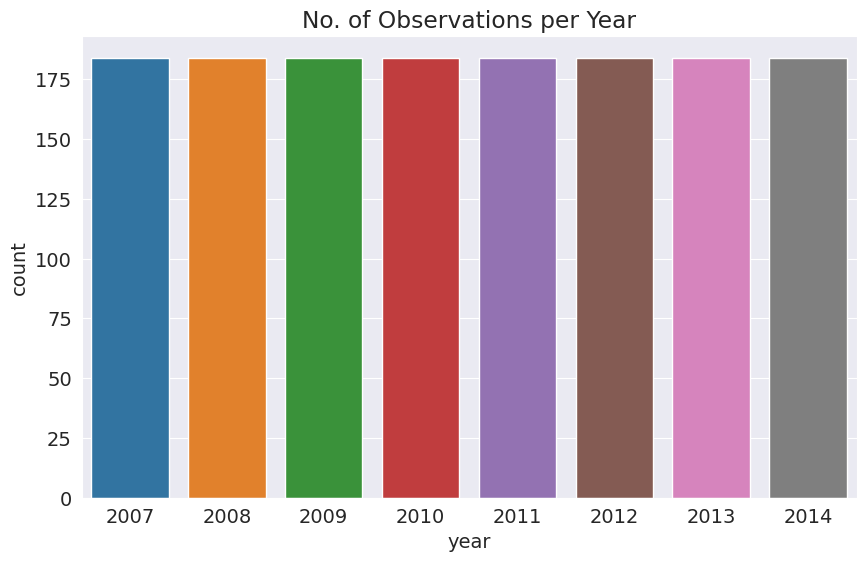

In [ ]:
plt.title('No. of Observations per Year')
sns.countplot(x = weather_test.year);

In [ ]:
import plotly.graph_objects as go
fig = go.Figure()

years = [2007, 2009, 2011, 2013]

for year in years:
    fig.add_trace(go.Violin(x = weather_test['year'][weather_test['year'] == year],
                            y = weather_test['Tavg'][weather_test['year'] == year],
                            name = str(year),
                            box_visible=True, points = 'all',
                            meanline_visible=True))

fig.show()

In [ ]:
import plotly.graph_objects as go
fig = go.Figure()

years = [2008, 2010, 2012, 2014]

for year in years:
    fig.add_trace(go.Violin(x = weather_test['year'][weather_test['year'] == year],
                            y = weather_test['Tavg'][weather_test['year'] == year],
                            name = str(year),
                            box_visible=True, points = 'all',
                            meanline_visible=True))

fig.show()

In [ ]:
import plotly.graph_objects as go
fig = go.Figure()

years = weather_test['year'].unique()

for year in years:
    fig.add_trace(go.Violin(x = weather_test['year'][weather_test['year'] == year],
                            y = weather_test['Tavg'][weather_test['year'] == year],
                            name = str(year),
                            box_visible=True, points = 'all',
                            meanline_visible=True))

fig.show()

In [ ]:
import plotly.graph_objects as go
fig = go.Figure()

months = weather_test['month'].unique()

for month in months:
    fig.add_trace(go.Violin(x = weather_test['month'][weather_test['month'] == month],
                            y = weather_test['Tavg'][weather_test['month'] == month],
                            name = str(month),
                            box_visible=True, points = 'all',
                            meanline_visible=True))

fig.show()

## 4. Merging data

In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10506 entries, 0 to 10505
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Date                    10506 non-null  datetime64[ns]
 1   Address                 10506 non-null  object        
 2   Species                 10506 non-null  object        
 3   Block                   10506 non-null  int64         
 4   Street                  10506 non-null  object        
 5   Trap                    10506 non-null  object        
 6   AddressNumberAndStreet  10506 non-null  object        
 7   Latitude                10506 non-null  float64       
 8   Longitude               10506 non-null  float64       
 9   AddressAccuracy         10506 non-null  int64         
 10  NumMosquitos            10506 non-null  int64         
 11  WnvPresent              10506 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(4), ob

In [ ]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116293 entries, 0 to 116292
Data columns (total 11 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   Id                      116293 non-null  int64         
 1   Date                    116293 non-null  datetime64[ns]
 2   Address                 116293 non-null  object        
 3   Species                 116293 non-null  object        
 4   Block                   116293 non-null  int64         
 5   Street                  116293 non-null  object        
 6   Trap                    116293 non-null  object        
 7   AddressNumberAndStreet  116293 non-null  object        
 8   Latitude                116293 non-null  float64       
 9   Longitude               116293 non-null  float64       
 10  AddressAccuracy         116293 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(3), object(5)
memory usage: 9.8+ MB


In [ ]:
train_df

,Date,Address,Species,Block,Street,Trap,AddressNumberAndStreet,Latitude,Longitude,AddressAccuracy,NumMosquitos,WnvPresent
0,2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX PIPIENS/RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.954690,-87.800991,9,1,0
1,2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.954690,-87.800991,9,1,0
2,2007-05-29,"6200 North Mandell Avenue, Chicago, IL 60646, USA",CULEX RESTUANS,62,N MANDELL AVE,T007,"6200 N MANDELL AVE, Chicago, IL",41.994991,-87.769279,9,1,0
3,2007-05-29,"7900 West Foster Avenue, Chicago, IL 60656, USA",CULEX PIPIENS/RESTUANS,79,W FOSTER AVE,T015,"7900 W FOSTER AVE, Chicago, IL",41.974089,-87.824812,8,1,0
4,2007-05-29,"7900 West Foster Avenue, Chicago, IL 60656, USA",CULEX RESTUANS,79,W FOSTER AVE,T015,"7900 W FOSTER AVE, Chicago, IL",41.974089,-87.824812,8,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...
10501,2013-09-26,"5100 West 72nd Street, Chicago, IL 60638, USA",CULEX PIPIENS/RESTUANS,51,W 72ND ST,T035,"5100 W 72ND ST, Chicago, IL",41.763733,-87.742302,8,6,1
10502,2013-09-26,"5800 North Ridge Avenue, Chicago, IL 60660, USA",CULEX PIPIENS/RESTUANS,58,N RIDGE AVE,T231,"5800 N RIDGE AVE, Chicago, IL",41.987280,-87.666066,8,5,0
10503,2013-09-26,"1700 North Ashland Avenue, Chicago, IL 60622, USA",CULEX PIPIENS/RESTUANS,17,N ASHLAND AVE,T232,"1700 N ASHLAND AVE, Chicago, IL",41.912563,-87.668055,9,1,0
10504,2013-09-26,"7100 North Harlem Avenue, Chicago, IL 60631, USA",CULEX PIPIENS/RESTUANS,71,N HARLEM AVE,T233,"7100 N HARLEM AVE, Chicago, IL",42.009876,-87.807277,9,5,0


- We already have enough data about location(via latitude and longitude) so we don't need the few columns about address.


In [ ]:
train_df = train_df.drop(train_df[['Address', 'AddressNumberAndStreet']], axis = 1)

In [ ]:
train_df.sample(5)

,Date,Species,Block,Street,Trap,Latitude,Longitude,AddressAccuracy,NumMosquitos,WnvPresent
9428,2013-08-08,CULEX PIPIENS/RESTUANS,30,W 18TH ST,T043,41.857402,-87.694991,8,8,0
8800,2013-07-12,CULEX RESTUANS,40,E 130TH ST,T221,41.659112,-87.538693,8,3,0
3416,2007-09-24,CULEX PIPIENS/RESTUANS,11,W CHICAGO,T049,41.896282,-87.655232,8,3,0
2809,2007-08-28,CULEX PIPIENS/RESTUANS,11,S AVENUE L,T103,41.702724,-87.536497,5,49,0
9072,2013-07-25,CULEX RESTUANS,45,N CAMPBELL AVE,T220,41.963976,-87.691810,9,3,0


In [ ]:
train_df = train_df.drop(train_df[['Street']], axis = 1)

In [ ]:
train_df.corr()

,Block,Latitude,Longitude,AddressAccuracy,NumMosquitos,WnvPresent
Block,1.000000,0.091110,-0.090375,0.222134,-0.172388,0.004877
Latitude,0.091110,1.000000,-0.701795,0.444026,-0.184806,0.028697
Longitude,-0.090375,-0.701795,1.000000,-0.456775,0.036633,-0.060345
AddressAccuracy,0.222134,0.444026,-0.456775,1.000000,-0.248414,0.008064
NumMosquitos,-0.172388,-0.184806,0.036633,-0.248414,1.000000,0.196820
WnvPresent,0.004877,0.028697,-0.060345,0.008064,0.196820,1.000000


The columns Block and AddressAccuracy doesn't have great correlation with target column, so we can remove them for training.

In [ ]:
train_df = train_df.drop(train_df[['AddressAccuracy','Block']], axis = 1)

In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10506 entries, 0 to 10505
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          10506 non-null  datetime64[ns]
 1   Species       10506 non-null  object        
 2   Trap          10506 non-null  object        
 3   Latitude      10506 non-null  float64       
 4   Longitude     10506 non-null  float64       
 5   NumMosquitos  10506 non-null  int64         
 6   WnvPresent    10506 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(2), object(2)
memory usage: 574.7+ KB


In [ ]:
merged_df = pd.merge(train_df, weather_final, how = 'left', on = 'Date')
merged_df.head()

,Date,Species,Trap,Latitude,Longitude,NumMosquitos,WnvPresent,Tmax,Tmin,Tavg,Depart,DewPoint,WetBulb,Heat,Cool,Sunrise,Sunset,StnPressure,SeaLevel,ResultSpeed,ResultDir,AvgSpeed,BCFG,BR,DZ,FG,FG+,FU,GR,HZ,MIFG,RA,SN,SQ,TS,TSRA,U,VCFG,VCTS
0,2007-05-29,CULEX PIPIENS/RESTUANS,T002,41.954690,-87.800991,1,0,88.0,62.5,75.5,10.0,58.5,65.5,0.0,10.5,421.0,1917.0,29.42,29.42,5.8,17.0,6.95,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
1,2007-05-29,CULEX RESTUANS,T002,41.954690,-87.800991,1,0,88.0,62.5,75.5,10.0,58.5,65.5,0.0,10.5,421.0,1917.0,29.42,29.42,5.8,17.0,6.95,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,2007-05-29,CULEX RESTUANS,T007,41.994991,-87.769279,1,0,88.0,62.5,75.5,10.0,58.5,65.5,0.0,10.5,421.0,1917.0,29.42,29.42,5.8,17.0,6.95,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
3,2007-05-29,CULEX PIPIENS/RESTUANS,T015,41.974089,-87.824812,1,0,88.0,62.5,75.5,10.0,58.5,65.5,0.0,10.5,421.0,1917.0,29.42,29.42,5.8,17.0,6.95,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
4,2007-05-29,CULEX RESTUANS,T015,41.974089,-87.824812,4,0,88.0,62.5,75.5,10.0,58.5,65.5,0.0,10.5,421.0,1917.0,29.42,29.42,5.8,17.0,6.95,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0


In [ ]:
merged_df['month'] = merged_df['Date'].dt.month

In [ ]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10506 entries, 0 to 10505
Data columns (total 40 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          10506 non-null  datetime64[ns]
 1   Species       10506 non-null  object        
 2   Trap          10506 non-null  object        
 3   Latitude      10506 non-null  float64       
 4   Longitude     10506 non-null  float64       
 5   NumMosquitos  10506 non-null  int64         
 6   WnvPresent    10506 non-null  int64         
 7   Tmax          10506 non-null  float64       
 8   Tmin          10506 non-null  float64       
 9   Tavg          10506 non-null  float64       
 10  Depart        10506 non-null  float64       
 11  DewPoint      10506 non-null  float64       
 12  WetBulb       10506 non-null  float64       
 13  Heat          10506 non-null  float64       
 14  Cool          10506 non-null  float64       
 15  Sunrise       10506 non-null  float6

In [ ]:
merged_df = merged_df.drop(merged_df[['Depart']], axis = 1)

In [ ]:
corr_df=merged_df.corr()['WnvPresent']

In [ ]:
corr_df[corr_df>0].sort_values()

ResultDir       0.000175
StnPressure     0.011336
SeaLevel        0.011336
HZ              0.016541
FG              0.021312
BR              0.027292
Latitude        0.028697
RA              0.032734
Tmax            0.048244
TSRA            0.055740
TS              0.057956
Cool            0.058101
Tavg            0.064256
Tmin            0.074048
WetBulb         0.079363
DewPoint        0.085883
month           0.100143
Sunrise         0.105227
NumMosquitos    0.196820
WnvPresent      1.000000
Name: WnvPresent, dtype: float64

In [ ]:
corr_df[corr_df<0].sort_values()

Sunset        -0.068451
Longitude     -0.060345
Heat          -0.054740
U             -0.050402
ResultSpeed   -0.046298
VCTS          -0.029558
AvgSpeed      -0.029416
DZ            -0.026788
Name: WnvPresent, dtype: float64

We can remove few columns which have very less correlation with target inorder to speed up our model.

In [ ]:
merged_df= merged_df.drop(merged_df[['ResultDir']], axis = 1)

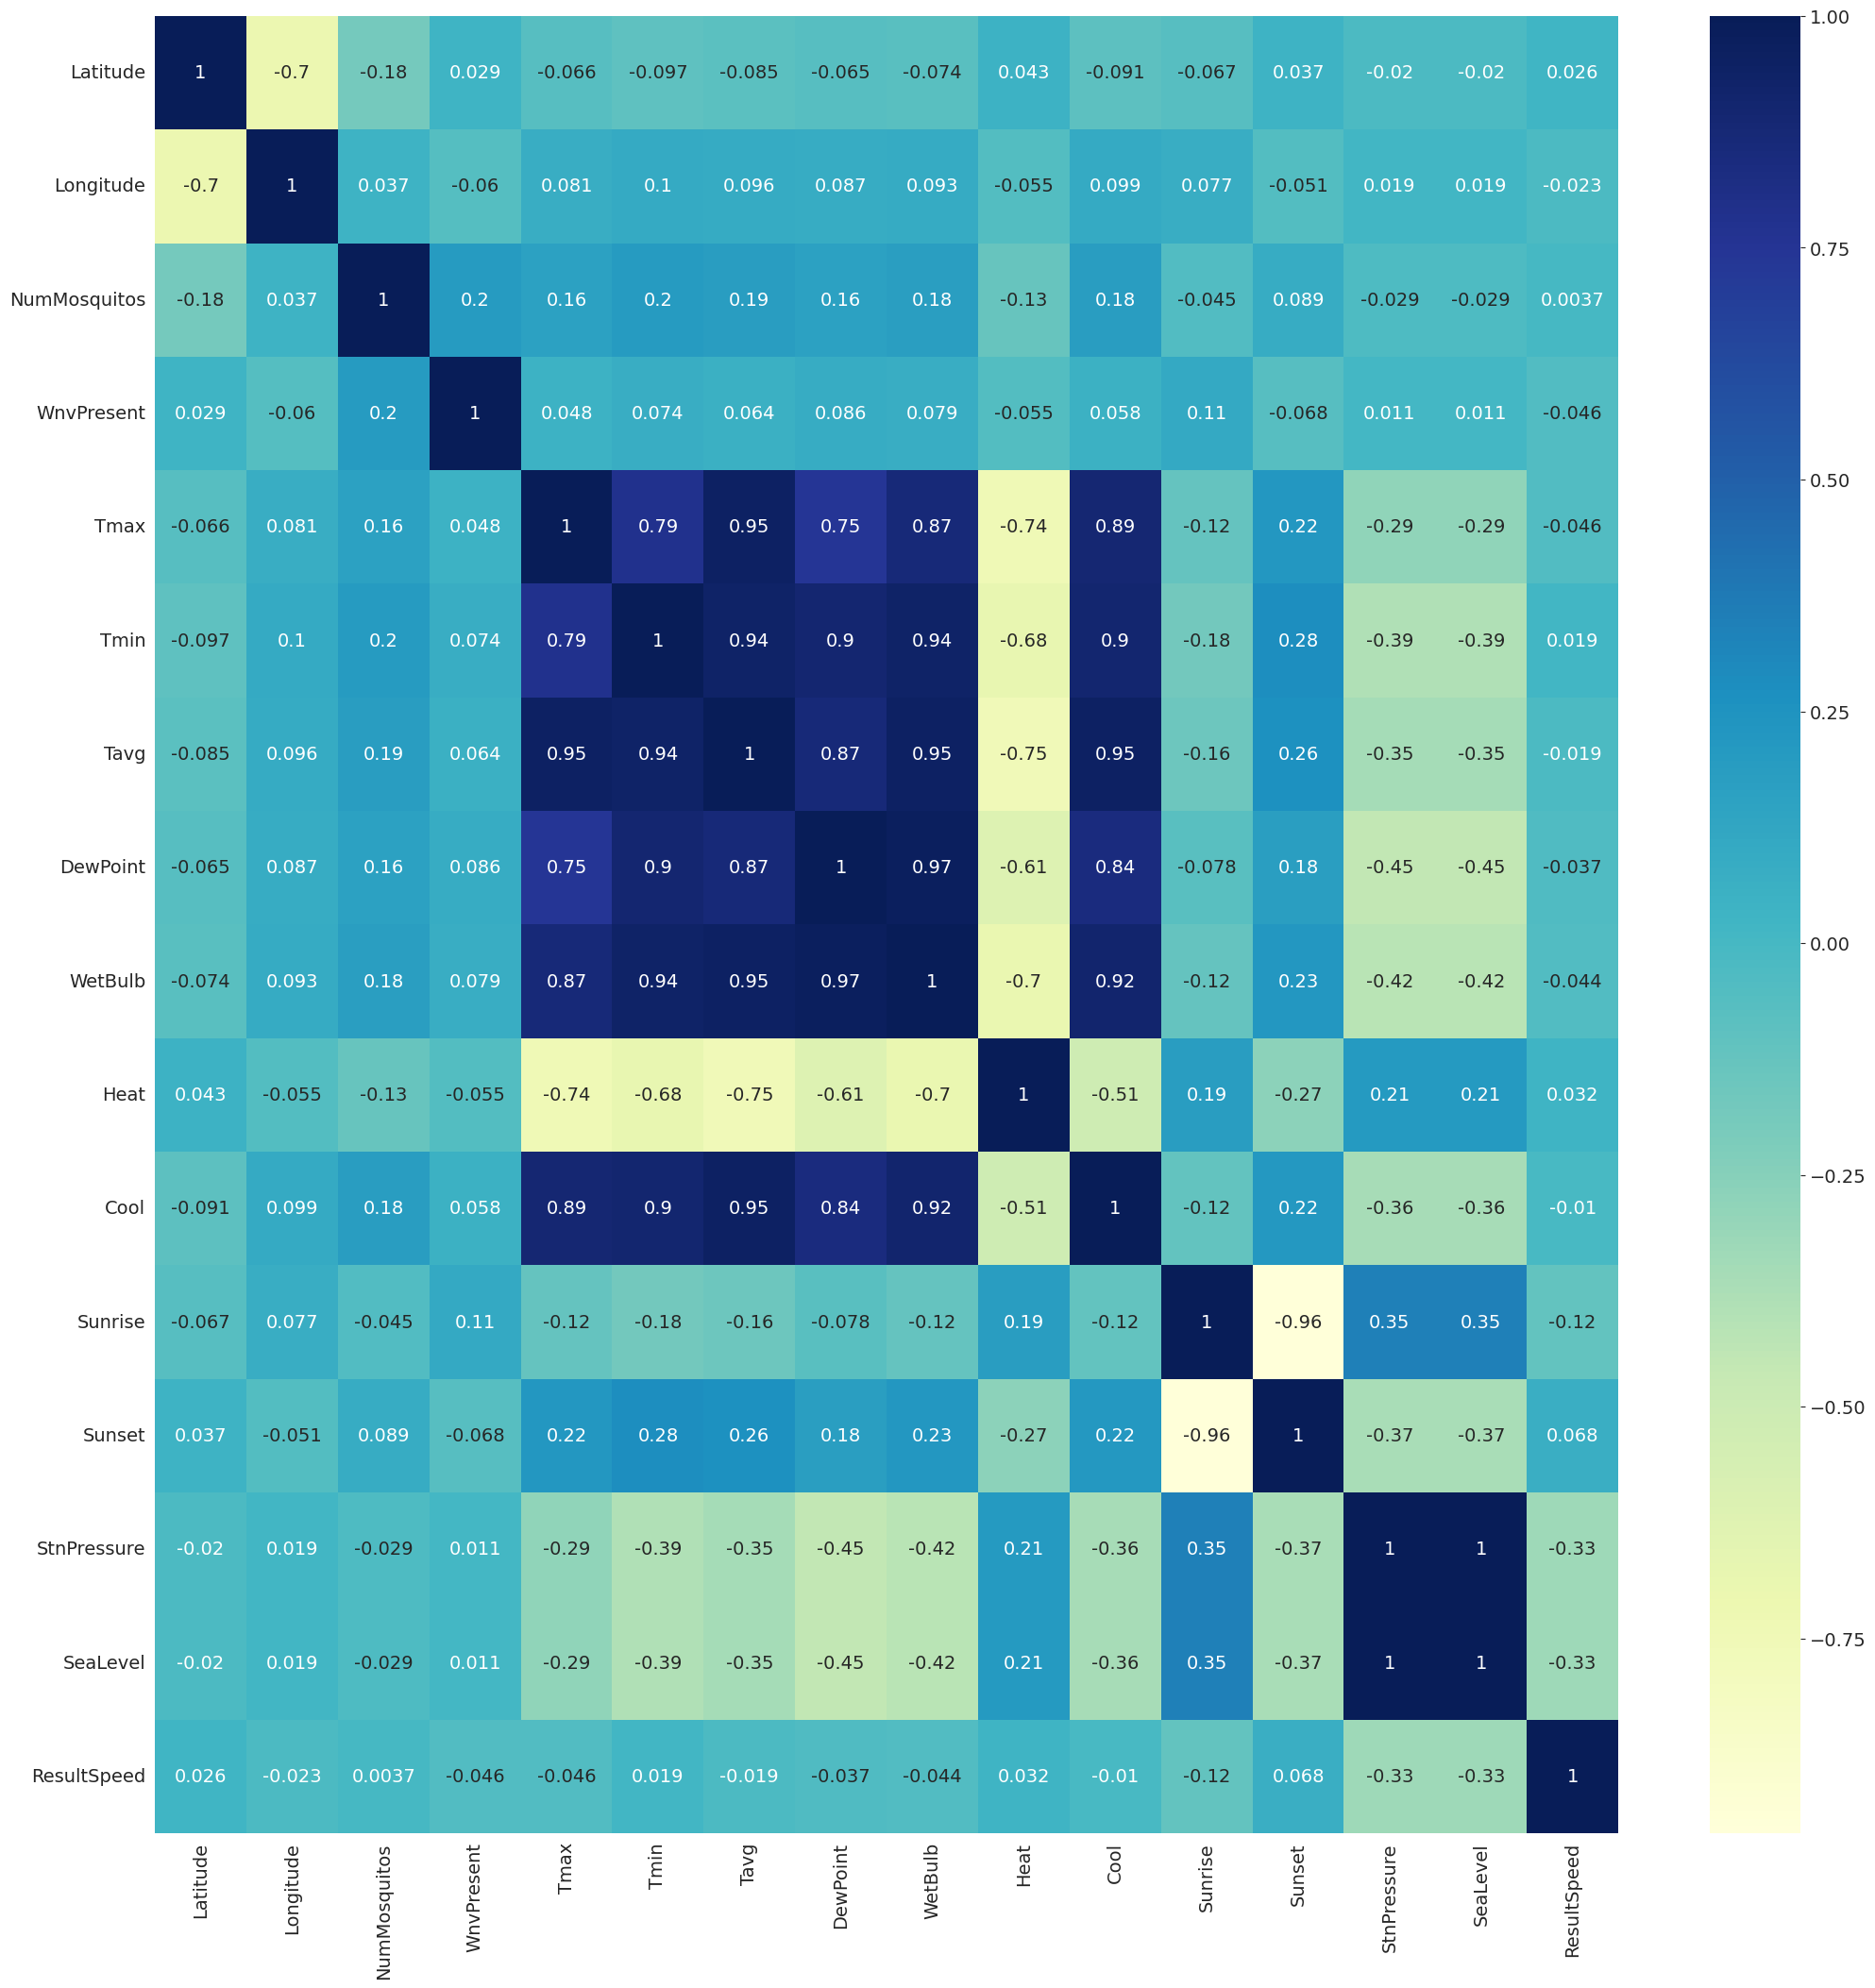

In [ ]:
# Draw the heatmap
fig = plt.figure(figsize = (25, 25))
sns.heatmap(merged_df.corr().iloc[:16, :16], cmap = "YlGnBu", annot = True);

## 5. Preparing Data for Training

In [ ]:
!pip install scikit-learn --upgrade --quiet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 62.6 MB/s eta 0:00:00


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
mtrain_df, val_df = train_test_split(merged_df, test_size=0.2, random_state=42)

In [ ]:
print('mtrain_df.shape :', mtrain_df.shape)
print('val_df.shape :', val_df.shape)

mtrain_df.shape : (8404, 38)
val_df.shape : (2102, 38)


In [ ]:
mtrain_df.columns

Index(['Date', 'Species', 'Trap', 'Latitude', 'Longitude', 'NumMosquitos',
       'WnvPresent', 'Tmax', 'Tmin', 'Tavg', 'DewPoint', 'WetBulb', 'Heat',
       'Cool', 'Sunrise', 'Sunset', 'StnPressure', 'SeaLevel', 'ResultSpeed',
       'AvgSpeed', 'BCFG', 'BR', 'DZ', 'FG', 'FG+', 'FU', 'GR', 'HZ', 'MIFG',
       'RA', 'SN', 'SQ', 'TS', 'TSRA', 'U', 'VCFG', 'VCTS', 'month'],
      dtype='object')

In [ ]:
input_cols = ['Date', 'Species', 'Trap', 'Latitude', 'Longitude', 'NumMosquitos',
              'Tmax', 'Tmin', 'Tavg', 'DewPoint', 'WetBulb', 'Heat',
              'Cool', 'Sunrise', 'Sunset', 'StnPressure', 'SeaLevel', 'ResultSpeed',
              'AvgSpeed', 'BCFG', 'BR', 'DZ', 'FG', 'FG+', 'FU', 'GR', 'HZ', 'MIFG',
              'RA', 'SN', 'SQ', 'TS', 'TSRA', 'U', 'VCFG', 'VCTS', 'month']
target_col = 'WnvPresent'

In [ ]:
train_inputs = mtrain_df[input_cols].copy()
train_targets = mtrain_df[target_col].copy()

In [ ]:
val_inputs = val_df[input_cols].copy()
val_targets = val_df[target_col].copy()

In [ ]:
train_targets

3412    0
617     0
6221    0
7020    0
745     0
       ..
5734    0
5191    1
5390    0
860     0
7270    0
Name: WnvPresent, Length: 8404, dtype: int64

In [ ]:
numeric_cols = train_inputs.select_dtypes(include=np.number).columns.tolist()
categorical_cols = train_inputs.select_dtypes('object').columns.tolist()

In [ ]:
train_inputs[numeric_cols].describe()

,Latitude,Longitude,NumMosquitos,Tmax,Tmin,Tavg,DewPoint,WetBulb,Heat,Cool,Sunrise,Sunset,StnPressure,SeaLevel,ResultSpeed,AvgSpeed,BCFG,BR,DZ,FG,FG+,FU,GR,HZ,MIFG,RA,SN,SQ,TS,TSRA,U,VCFG,VCTS,month
count,8404.000000,8404.000000,8404.000000,8404.000000,8404.000000,8404.000000,8404.000000,8404.000000,8404.000000,8404.000000,8404.000000,8404.000000,8404.000000,8404.000000,8404.000000,8404.000000,8404.0,8404.000000,8404.000000,8404.000000,8404.0,8404.0,8404.0,8404.000000,8404.0,8404.000000,8404.0,8404.0,8404.000000,8404.000000,8404.000000,8404.0,8404.000000,8404.000000
mean,41.840687,-87.699609,12.808306,81.866909,63.614231,72.980485,59.615659,64.793015,0.902249,8.882734,469.086625,1869.944550,29.281730,29.281730,5.927927,7.439523,0.0,0.272846,0.016421,0.011066,0.0,0.0,0.0,0.172061,0.0,0.299381,0.0,0.0,0.051999,0.132913,0.489053,0.0,0.018325,7.706449
std,0.112950,0.096540,16.074207,8.322399,7.505457,7.496398,7.831538,6.734662,2.728054,5.720395,45.630165,63.503058,0.114586,0.114586,2.835950,2.503817,0.0,0.445449,0.127095,0.104618,0.0,0.0,0.0,0.377456,0.0,0.458014,0.0,0.0,0.222038,0.339501,0.499910,0.0,0.134130,1.065666
min,41.644612,-87.930995,1.000000,57.500000,42.500000,51.000000,39.000000,47.000000,0.000000,0.000000,416.000000,1720.000000,28.920000,28.920000,0.600000,2.400000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,5.000000
25%,41.732984,-87.760070,2.000000,78.000000,59.500000,70.000000,54.500000,61.500000,0.000000,5.000000,429.000000,1832.000000,29.200000,29.200000,4.000000,5.750000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,7.000000
50%,41.846075,-87.694991,5.000000,83.000000,65.500000,74.500000,60.000000,65.500000,0.000000,9.500000,451.000000,1904.000000,29.300000,29.300000,5.650000,7.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,8.000000
75%,41.954690,-87.627796,17.000000,88.000000,69.500000,78.500000,66.500000,70.000000,0.000000,13.500000,514.000000,1924.000000,29.360000,29.360000,7.850000,9.350000,0.0,1.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,1.000000,0.0,0.0,0.000000,0.000000,1.000000,0.0,0.000000,8.000000
max,42.017430,-87.531635,50.000000,96.500000,77.500000,85.500000,73.000000,76.000000,14.000000,20.500000,557.000000,1931.000000,29.620000,29.620000,15.000000,15.650000,0.0,1.000000,1.000000,1.000000,0.0,0.0,0.0,1.000000,0.0,1.000000,0.0,0.0,1.000000,1.000000,1.000000,0.0,1.000000,10.000000


In [ ]:
train_inputs[categorical_cols].nunique()

Species      7
Trap       136
dtype: int64

In [ ]:
train_inputs[numeric_cols].isna().sum()

Latitude        0
Longitude       0
NumMosquitos    0
Tmax            0
Tmin            0
Tavg            0
DewPoint        0
WetBulb         0
Heat            0
Cool            0
Sunrise         0
Sunset          0
StnPressure     0
SeaLevel        0
ResultSpeed     0
AvgSpeed        0
BCFG            0
BR              0
DZ              0
FG              0
FG+             0
FU              0
GR              0
HZ              0
MIFG            0
RA              0
SN              0
SQ              0
TS              0
TSRA            0
U               0
VCFG            0
VCTS            0
month           0
dtype: int64

### Scaling Numeric Features

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()

In [ ]:
scaler.fit(merged_df[numeric_cols])

MinMaxScaler()

In [ ]:
train_inputs[numeric_cols] = scaler.transform(train_inputs[numeric_cols])
val_inputs[numeric_cols] = scaler.transform(val_inputs[numeric_cols])

In [ ]:
train_inputs[numeric_cols].describe()

,Latitude,Longitude,NumMosquitos,Tmax,Tmin,Tavg,DewPoint,WetBulb,Heat,Cool,Sunrise,Sunset,StnPressure,SeaLevel,ResultSpeed,AvgSpeed,BCFG,BR,DZ,FG,FG+,FU,GR,HZ,MIFG,RA,SN,SQ,TS,TSRA,U,VCFG,VCTS,month
count,8404.000000,8404.000000,8404.000000,8404.000000,8404.000000,8404.000000,8404.000000,8404.000000,8404.000000,8404.000000,8404.000000,8404.000000,8404.000000,8404.000000,8404.000000,8404.000000,8404.0,8404.000000,8404.000000,8404.000000,8404.0,8404.0,8404.0,8404.000000,8404.0,8404.000000,8404.0,8404.0,8404.000000,8404.000000,8404.000000,8404.0,8404.000000,8404.000000
mean,0.525928,0.579391,0.240986,0.624793,0.603264,0.637116,0.606343,0.613552,0.064446,0.433304,0.376501,0.710638,0.516757,0.516757,0.369995,0.380341,0.0,0.272846,0.016421,0.011066,0.0,0.0,0.0,0.172061,0.0,0.299381,0.0,0.0,0.051999,0.132913,0.489053,0.0,0.018325,0.541290
std,0.302964,0.241738,0.328045,0.213395,0.214442,0.217287,0.230339,0.232230,0.194861,0.279044,0.323618,0.300962,0.163694,0.163694,0.196941,0.188967,0.0,0.445449,0.127095,0.104618,0.0,0.0,0.0,0.377456,0.0,0.458014,0.0,0.0,0.222038,0.339501,0.499910,0.0,0.134130,0.213133
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
25%,0.237038,0.427997,0.020408,0.525641,0.485714,0.550725,0.455882,0.500000,0.000000,0.243902,0.092199,0.530806,0.400000,0.400000,0.236111,0.252830,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.400000
50%,0.540379,0.590956,0.081633,0.653846,0.657143,0.681159,0.617647,0.637931,0.000000,0.463415,0.248227,0.872038,0.542857,0.542857,0.350694,0.347170,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.600000
75%,0.831714,0.759212,0.326531,0.782051,0.771429,0.797101,0.808824,0.793103,0.000000,0.658537,0.695035,0.966825,0.628571,0.628571,0.503472,0.524528,0.0,1.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,1.000000,0.0,0.0,0.000000,0.000000,1.000000,0.0,0.000000,0.600000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,0.0,0.0,0.0,1.000000,0.0,1.000000,0.0,0.0,1.000000,1.000000,1.000000,0.0,1.000000,1.000000


### Encoding Categorical Data

In [ ]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')

In [ ]:
encoder.fit(merged_df[categorical_cols])

OneHotEncoder(handle_unknown='ignore', sparse=False, sparse_output=False)

In [ ]:
encoder.categories_

[array(['CULEX ERRATICUS', 'CULEX PIPIENS', 'CULEX PIPIENS/RESTUANS',
        'CULEX RESTUANS', 'CULEX SALINARIUS', 'CULEX TARSALIS',
        'CULEX TERRITANS'], dtype=object),
 array(['T001', 'T002', 'T003', 'T004', 'T005', 'T006', 'T007', 'T008',
        'T009', 'T011', 'T012', 'T013', 'T014', 'T015', 'T016', 'T017',
        'T018', 'T019', 'T025', 'T027', 'T028', 'T030', 'T031', 'T033',
        'T034', 'T035', 'T036', 'T037', 'T039', 'T040', 'T043', 'T044',
        'T045', 'T046', 'T047', 'T048', 'T049', 'T050', 'T051', 'T054',
        'T054C', 'T060', 'T061', 'T062', 'T063', 'T065', 'T066', 'T067',
        'T069', 'T070', 'T071', 'T072', 'T073', 'T074', 'T075', 'T076',
        'T077', 'T078', 'T079', 'T080', 'T081', 'T082', 'T083', 'T084',
        'T085', 'T086', 'T088', 'T089', 'T090', 'T091', 'T092', 'T094',
        'T094B', 'T095', 'T096', 'T097', 'T099', 'T100', 'T102', 'T103',
        'T107', 'T114', 'T115', 'T128', 'T129', 'T135', 'T138', 'T141',
        'T142', 'T143', 'T144

In [ ]:
encoded_cols = list(encoder.get_feature_names_out(categorical_cols))

In [ ]:
train_inputs[encoded_cols] = encoder.transform(train_inputs[categorical_cols])
val_inputs[encoded_cols] = encoder.transform(val_inputs[categorical_cols])

In [ ]:
X=train_inputs[numeric_cols+encoded_cols]
targets=train_targets

### Saving Processed Data to Disk

In [ ]:
train_inputs.to_parquet('train_inputs.parquet')
val_inputs.to_parquet('val_inputs.parquet')

## 6. Training the  Base line and Logistic regression models

In [ ]:
X_train = train_inputs[numeric_cols + encoded_cols]
X_val = val_inputs[numeric_cols + encoded_cols]

### Baseline models

In [ ]:
from sklearn.metrics import accuracy_score
def random_guess(inputs):
    return np.random.choice([0, 1], len(inputs))

def all_no(inputs):
    return np.full(len(inputs), 0)

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
accuracy_score(val_targets, random_guess(X_val))

0.5

In [ ]:
accuracy_score(val_targets, all_no(X_val))

0.9476688867745005

### Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state = 42, solver='liblinear', penalty = 'l2', class_weight = 'balanced')

In [ ]:
lr.fit(X, train_targets)

LogisticRegression(class_weight='balanced', random_state=42, solver='liblinear')

In [ ]:
train_preds = lr.predict(X_train)

In [ ]:
train_probs = lr.predict_proba(X_train)
train_probs

array([[0.86437602, 0.13562398],
       [0.50624006, 0.49375994],
       [0.83043447, 0.16956553],
       ...,
       [0.76523337, 0.23476663],
       [0.92808305, 0.07191695],
       [0.86132005, 0.13867995]])

In [ ]:
val_preds = lr.predict(X_val)

In [ ]:
val_probs = lr.predict_proba(X_val)
val_probs

array([[9.99696089e-01, 3.03910935e-04],
       [4.73561742e-01, 5.26438258e-01],
       [8.67667144e-01, 1.32332856e-01],
       ...,
       [8.31704705e-01, 1.68295295e-01],
       [7.38175140e-01, 2.61824860e-01],
       [8.27389974e-01, 1.72610026e-01]])

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
lr.classes_

array([0, 1])

In [ ]:
confusion_matrix(train_targets, train_preds, normalize='true')

array([[0.7611453, 0.2388547],
       [0.1814059, 0.8185941]])

In [ ]:
def predict_and_plot(inputs, targets, name=''):
    preds = lr.predict(inputs)

    accuracy = accuracy_score(targets, preds)
    print("Accuracy: {:.2f}%".format(accuracy * 100))

    cf = confusion_matrix(targets, preds, normalize='true')
    plt.figure()
    sns.heatmap(cf, annot=True)
    plt.xlabel('Prediction')
    plt.ylabel('Target')
    plt.title('{} Confusion Matrix'.format(name));

    return preds

Accuracy: 76.42%


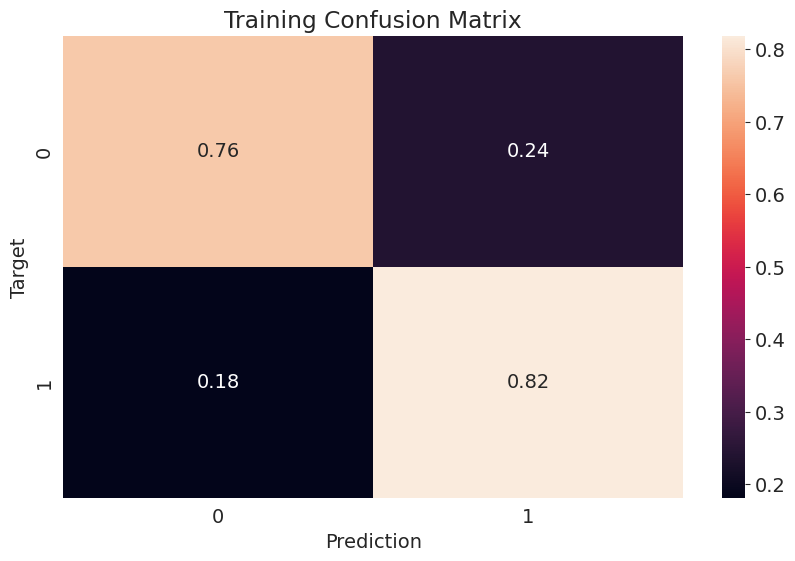

In [ ]:
train_preds = predict_and_plot(X_train, train_targets, 'Training')

Accuracy: 75.64%


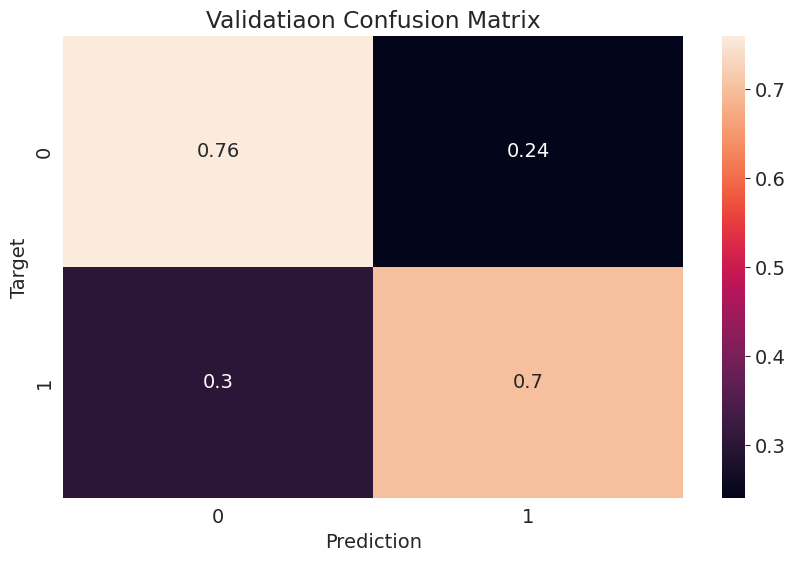

In [ ]:
val_preds = predict_and_plot(X_val, val_targets, 'Validatiaon')

In [ ]:
# calculate roc curve for lr2

from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

val_preds_proba = lr.predict_proba(X_val)
fpr, tpr, thresholds = roc_curve(val_targets, val_preds_proba[:,1])

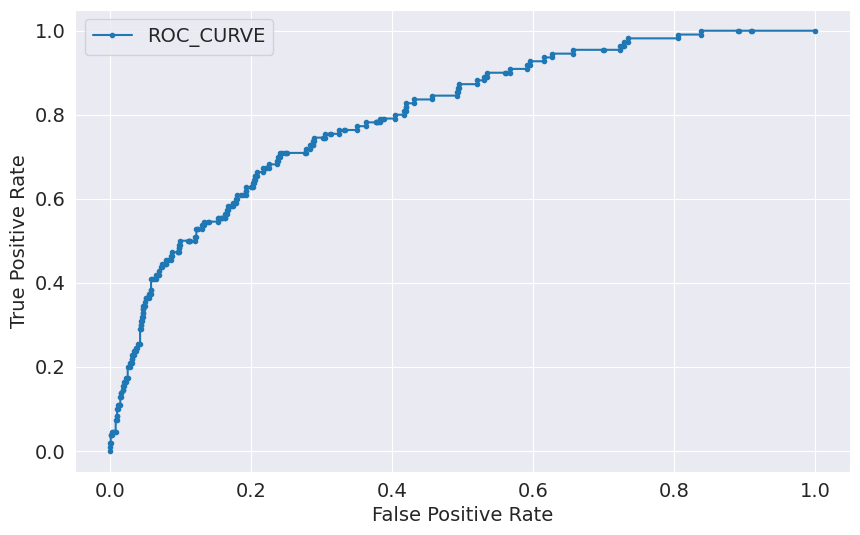

In [ ]:
plt.plot(fpr, tpr, marker='.', label='ROC_CURVE')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()

In [ ]:
auc = roc_auc_score(val_targets, val_preds_proba[:,1])
print('AUC: %.3f' % auc)

AUC: 0.798


In [ ]:
lr = LogisticRegression(random_state = 42, solver='liblinear', penalty = 'l2', class_weight = 'balanced')
lr.fit(train_inputs[numeric_cols + encoded_cols], train_targets)

LogisticRegression(class_weight='balanced', random_state=42, solver='liblinear')

In [ ]:
preds_proba = lr.predict_proba(train_inputs[numeric_cols + encoded_cols])
fpr, tpr, thresholds = roc_curve(train_targets, preds_proba[:,1])
auc = roc_auc_score(train_targets, preds_proba[:,1])
print('AUC: %.3f' % auc)

AUC: 0.879


In [ ]:
# calculate precision-recall AUC
from sklearn.metrics import precision_recall_curve
precision, recall, thresholds = precision_recall_curve(train_targets, preds_proba[:,1])

In [ ]:
from sklearn.metrics import auc
auc = auc(recall, precision)
print('AUC: %.3f' % auc)

AUC: 0.272


Looks like our model performance is pretty bad and the precision, recall score is very low. But let's move on to a different model.

## 7. Random Forests and XGB

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

from sklearn.metrics import accuracy_score, confusion_matrix
from collections import Counter

In [ ]:
rf = RandomForestClassifier(n_jobs=-1, random_state=42)

In [ ]:
%%time
rf.fit(X_train, train_targets)

CPU times: user 1.76 s, sys: 27 ms, total: 1.79 s
Wall time: 1.02 s


RandomForestClassifier(n_jobs=-1, random_state=42)

In [ ]:
def train_and_evaluate(X_train, train_targets, X_val, val_targets, model_name, **params):
    model = model_name(random_state=42, **params)
    model.fit(X_train, train_targets)
    train_acc = accuracy_score(model.predict(X_train), train_targets)
    val_acc = accuracy_score(model.predict(X_val), val_targets)
    return model, train_acc, val_acc

In [ ]:
def test_params(**params):
    model = RandomForestClassifier(random_state=42, n_jobs=-1, **params).fit(X_train, train_targets)
    return model.score(X_train, train_targets), model.score(X_val, val_targets)

In [ ]:
def predict_and_plot_2(inputs, targets,model, name=''):
    preds = model.predict(inputs)

    accuracy = accuracy_score(targets, preds)
    print("Accuracy: {:.2f}%".format(accuracy * 100))

    cf = confusion_matrix(targets, preds, normalize='true')
    plt.figure()
    sns.heatmap(cf, annot=True)
    plt.xlabel('Prediction')
    plt.ylabel('Target')
    plt.title('{} Confusion Matrix'.format(name));

    return preds

Accuracy: 94.53%


array([0, 0, 0, ..., 0, 0, 0])

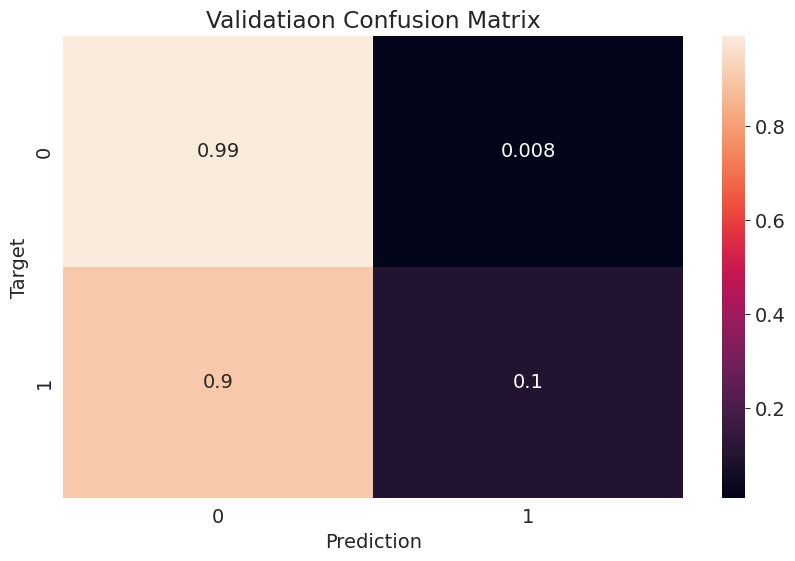

In [ ]:
predict_and_plot_2(X_val, val_targets,rf, 'Validatiaon')

Accuracy: 99.14%


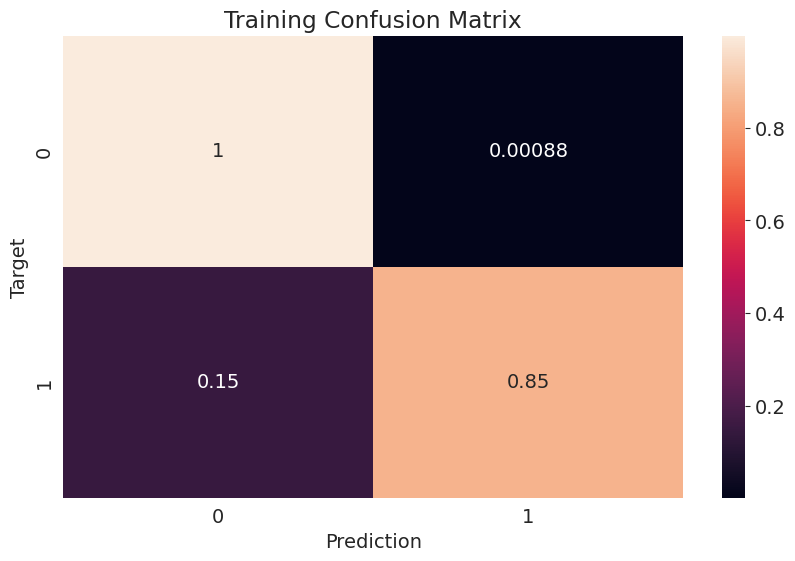

In [ ]:
train_preds_2 = predict_and_plot_2(X_train, train_targets,rf, 'Training')

In [ ]:
xgb = XGBClassifier(n_jobs = -1, random_state = 42)
xgb.fit(X_train, train_targets)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=-1, num_parallel_tree=None,
              predictor=None, random_state=42, ...)

In [ ]:
xgb.score(X_val, val_targets)

0.9481446241674596

Accuracy: 94.81%


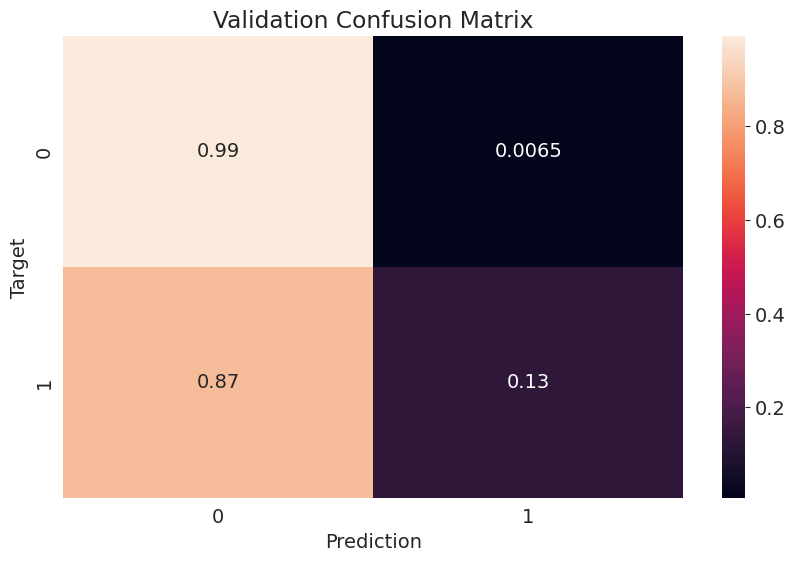

In [ ]:
val_preds = predict_and_plot_2(X_val, val_targets, xgb, 'Validation')

In [ ]:
importance_df = pd.DataFrame({
    'feature': X.columns,
    'importance': xgb.feature_importances_
}).sort_values('importance', ascending=False)

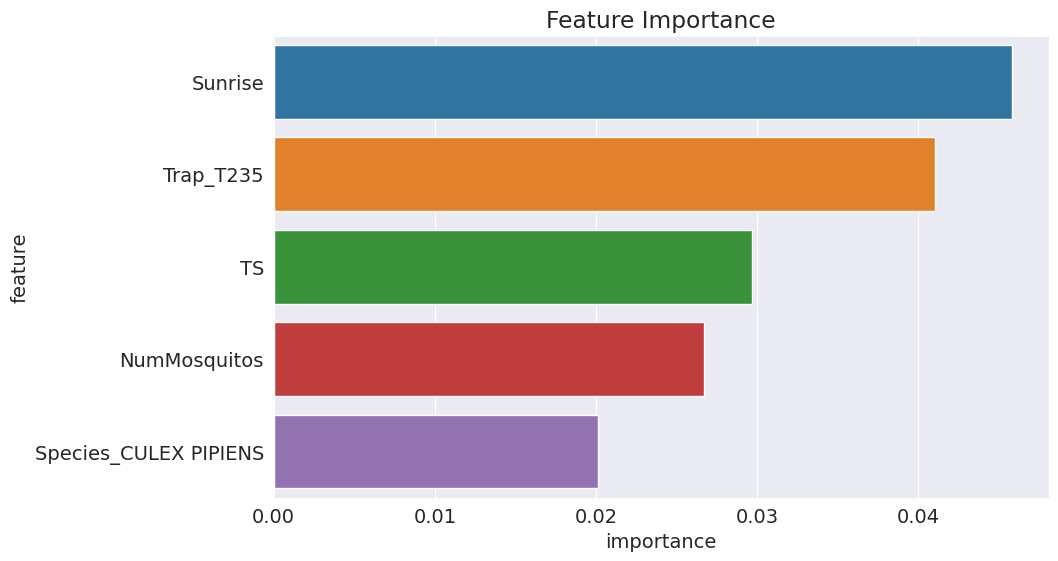

In [ ]:
plt.figure(figsize=(10,6))
plt.title('Feature Importance')
sns.barplot(data=importance_df.head(5), x='importance', y='feature');

Still there is no improvement on True Positives even after using XGB, now I have to explore and see for some good techniques to overcome this hurdle.

In [ ]:
from collections import Counter
len(X_train), Counter(train_targets)

(8404, Counter({0: 7963, 1: 441}))

In [ ]:
len(X_val), Counter(val_targets)

(2102, Counter({0: 1992, 1: 110}))

## 8. Synthetic Minority Oversampling and handling **True Positives**
SMOTE is an oversampling method. It works by creating synthetic samples from the minor class instead of creating copies. The algorithm selects two or more similar instances (using a distance measure) and perturbing an instance one attribute at a time by a random amount within the difference to the neighboring instances.

In [ ]:
!pip install imbalanced-learn --upgrade --quiet

import imblearn
print(imblearn.__version__)

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.6/235.6 kB 6.9 MB/s eta 0:00:00
0.11.0


In [ ]:
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
X_smote, targets_smote = oversample.fit_resample(X, targets)

In [ ]:
counter = Counter(targets_smote)
print(counter)

Counter({0: 7963, 1: 7963})


In [ ]:
from imblearn.over_sampling import RandomOverSampler
oversample = RandomOverSampler(sampling_strategy=0.5)
X_random, y_random = oversample.fit_resample(X, targets)
counter = Counter(y_random)
counter

Counter({0: 7963, 1: 3981})

In [ ]:
from imblearn.combine import SMOTEENN
oversample = SMOTEENN()
X_smenn, y_smenn = oversample.fit_resample(X, targets)
counter = Counter(y_smenn)
print(counter)

Counter({1: 7240, 0: 5527})


In [ ]:
X_train, X_val, train_targets, val_targets = train_test_split(X_smote, targets_smote, test_size=0.15, random_state = 11)
X_train.shape, X_val.shape, train_targets.shape, val_targets.shape

((13537, 177), (2389, 177), (13537,), (2389,))

In [ ]:
print(train_targets.value_counts() / len(train_targets))
val_targets.value_counts() / len(val_targets)

1    0.501145
0    0.498855
Name: WnvPresent, dtype: float64


0    0.506488
1    0.493512
Name: WnvPresent, dtype: float64

In [ ]:
base_xgb = XGBClassifier(n_jobs = -1, random_state = 42)
base_xgb.fit(X_train, train_targets)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=-1, num_parallel_tree=None,
              predictor=None, random_state=42, ...)

In [ ]:
print("Validation set's Targets count in Percentage")
print(val_targets.value_counts() / len(val_targets), "\n")

train_preds = base_xgb.predict(X_train)

print("Model's Accuracy Score:")
print("Train set: ", accuracy_score(train_targets, train_preds), "\t\t", "Validation set:",
      base_xgb.score(X_val, val_targets))

print()

print("Train Set Predictions count:")
print(pd.value_counts(train_preds), "\n")
print("Train Set Targets count:")
print(pd.value_counts(train_targets), "\n\n")

val_preds = base_xgb.predict(X_val)
print("Validation Set Predictions count:")
print(pd.value_counts(val_preds), "\n")
print("Validation Set Targets count:")
print(pd.value_counts(val_targets), "\n\n")

In [ ]:
def test_param_and_plot(param_name, param_values):
    train_accs, val_accs = [], []
    for value in param_values:
        params = {param_name: value}
        train_acc, val_acc = test_params(**params)
        train_accs.append(train_acc)
        val_accs.append(val_acc)
    plt.figure(figsize=(10,6))
    plt.title('Overfitting curve: ' + param_name)
    plt.plot(param_values, train_accs, 'b-o')
    plt.plot(param_values, val_accs, 'r-o')
    plt.xlabel(param_name)
    plt.ylabel('Accuracy')
    plt.legend(['Training', 'Validation'])


def test_params(**params):
    model = XGBClassifier(n_jobs=-1, random_state=42, verbosity = 0, **params).fit(X_train, train_targets)
    return model.score(X_train, train_targets), model.score(X_val, val_targets)


def predict_and_plot(inputs, targets, model, name=''):
    preds = model.predict(inputs)

    accuracy = accuracy_score(targets, preds)
    print("Accuracy: {:.2f}%".format(accuracy * 100))

    cf = confusion_matrix(targets, preds, normalize='true')
    plt.figure()
    sns.heatmap(cf, annot=True, cmap= 'Blues')
    plt.xlabel('Prediction')
    plt.ylabel('Target')
    plt.title('{} Confusion Matrix'.format(name));
    plt.show()

    return preds

In [ ]:
tr_preds = predict_and_plot(X_train, train_targets, base_xgb, 'Validation')

In [ ]:
val_preds = predict_and_plot(X_val, val_targets, base_xgb, 'Validation')

A lot of improvement even without hyperparameter tuning. So we will use this technique along with XGB model

In [ ]:
importance_df = pd.DataFrame({
    'feature': X.columns,
    'importance': base_xgb.feature_importances_
}).sort_values('importance', ascending=False)

In [ ]:
plt.figure(figsize=(10,6))
plt.title('Feature Importance')
sns.barplot(data=importance_df.head(10), x='importance', y='feature');

### Hyperparameter Tuning

In [ ]:
test_params(n_estimators = 50)

In [ ]:
test_params(bootstrap = False)

In [ ]:
%%time
test_param_and_plot('n_estimators', [x for x in range(50, 550, 50)])

In [ ]:
test_params(booster = 'gblinear')

In [ ]:
%%time
test_param_and_plot('max_depth', [x for x in range(2, 25, 2)])

In [ ]:
%%time
test_param_and_plot('learning_rate', [x for x in [0.0005, 0.001, 0.005, 0.01, 0.05, 0.1, 0.15, 0.2]])

In [ ]:
%%time
test_param_and_plot('colsample_bynode', [x for x in [0.5, 0.75, 0.9]])

In [ ]:
%%time
test_param_and_plot('subsample', [x for x in [0.5, 0.75, 0.9]])

In [ ]:
%%time
test_param_and_plot('max_delta_step', [x for x in range(0, 6)])

## 9. Best Model

In [ ]:
final_model = XGBClassifier(n_jobs = -1, random_state = 42, max_depth = 16)
final_model.fit(X_smote, targets_smote)
final_model.score(X_smote, targets_smote)

0.9893256310435765

Accuracy: 98.91%


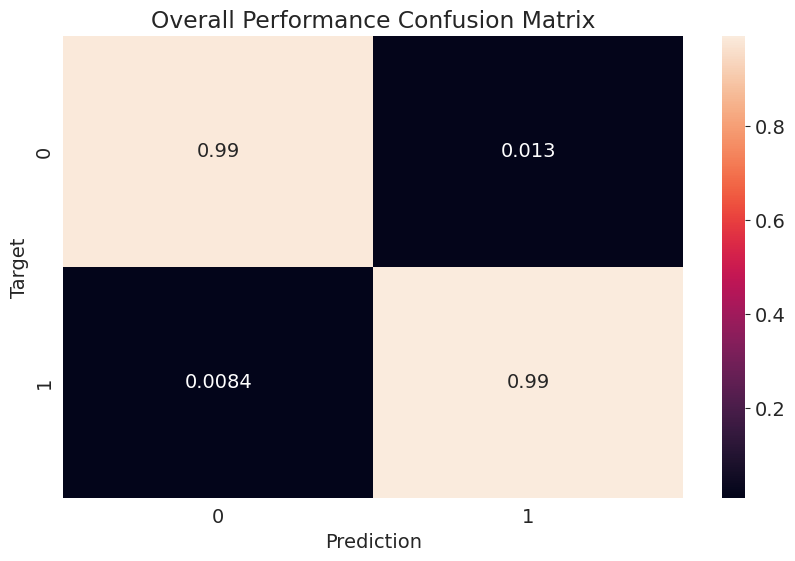

In [ ]:
preds = predict_and_plot(X_smote, targets_smote, final_model, 'Overall Performance')

This is a very good result compared compared to the previous one where we haven't used hyperparameter tuning. Please note that I have been trying to decrease the number of false negatives while working on this dataset

Accuracy: 98.93%


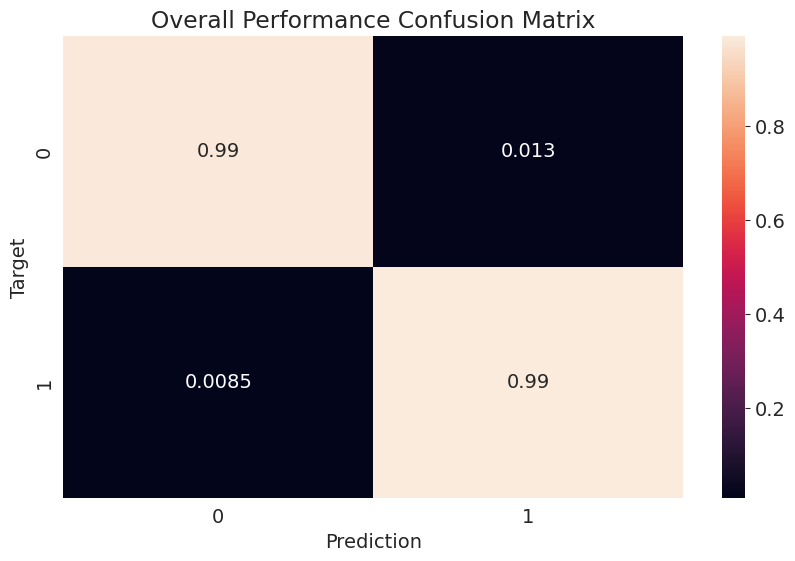

In [ ]:
final_model = XGBClassifier(n_jobs = -1, random_state = 42, max_depth = 16, max_delta_step=2, subsample=0.75,n_estimators=400)
final_model.fit(X_smote, targets_smote)
final_model.score(X_smote, targets_smote)
preds = predict_and_plot(X_smote, targets_smote, final_model, 'Overall Performance')

In [ ]:
final_model = XGBClassifier(n_jobs = -1, random_state = 42, max_depth = 16, n_estimators=400,
                            learning_rate = 0.15, colsample_bynode=0.75)
final_model.fit(X_smote, targets_smote)
final_model.score(X_smote, targets_smote)

Accuracy: 98.93%


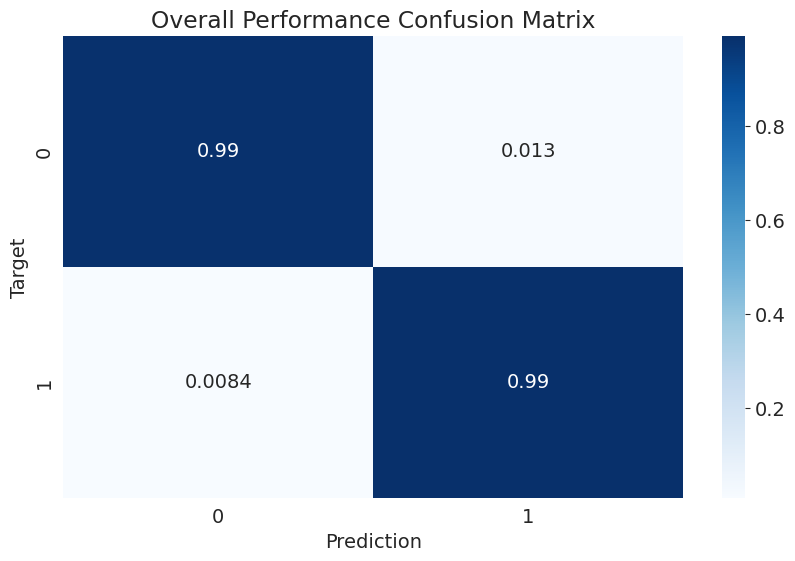

In [ ]:
preds = predict_and_plot(X_smote, targets_smote, final_model, 'Overall Performance')